### imports

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import scipy
from scipy import stats, signal
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

### Loading in Annotations

In [254]:
CAF106_path = '/Users/graciezhang/Documents/Hengen-Lab/Hengen-Lab-Work/Data/CAF106_NtoW.csv'

In [5]:
df = pd.read_csv(CAF106_path)
ant106_df = df.copy()

#created new row for some reason? not needed
ant106_df = ant106_df.drop(labels = 21, axis = 0)

ant106_df

Unnamed: 0  CAF00106-20210607T130839-140839_f1737-f1786.mp4  \
0   T-30:T-25                                              0.0   
1   T-25:T-20                                              0.0   
2   T-20:T-15                                              0.0   
3   T-15:T-10                                              0.0   
4    T-10:T-5                                              0.0   
5         T-5                                              0.0   
6         T-4                                              0.0   
7         T-3                                              0.0   
8         T-2                                              0.0   
9         T-1                                              0.0   
10        T-0                                              1.0   
11        T+1                                              1.0   
12        T+2                                              1.0   
13        T+3                                              1.0   
14        T+4                                              0.0   
15        T+5                                              0.0   
16   T+5:T+10                                              0.0   
17  T+10:T+15                                              0.0   
18  T+15:T+20                                              0.0   
19  T+20:T+25                                              0.0   
20  T+25:T+30                                              0.0   

    CAF00106-20210607T120839-130839_f8176-f8208.mp4  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              0.0   
11                                              1.0   
12                                              1.0   
13                                              0.0   
14                                              0.0   
15                                              0.0   
16                                              0.0   
17                                              0.0   
18                                              0.0   
19                                              1.0   
20                                              0.0   

    CAF00106-20210607T120839-130839_f8523-f8563.mp4  \
0                                               0.0   
1                                               1.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
5                                               0.0   
6                                               0.0   
7                                               0.0   
8                                               0.0   
9                                               0.0   
10                                              1.0   
11                                              0.0   
12                                              0.0   
13                                              0.0   
14                                              0.0   
15                                              0.0   
16                                              0.0   
17                                              0.0   
18                                              0.0   
19                                              0.0   
20                                              0.0   

    CAF00106-20210607T120839-130839_f10873-f10931.mp4  \
0                                                 0.0   
1             

### Loading in Optical Flow Data

In [255]:
of_df = pd.read_feather('Files/optical-flow-flickers-df-feather')

In [7]:
#individual mouse data - 99
mouse_name = "CAF106"
flicker_name = 'WAKE_WITHIN_NREM'

of106_df = of_df.loc[of_df['dataset_name'] == mouse_name]
of106_df

Unnamed: 0  label_wnr_012  predicted_wnr_012  confidence_wnr_01  \
8901097     11409413              0                  0           0.994496   
8901098     11409415              0                  0           0.994572   
8901099     11409417              0                  0           0.995682   
8901100     11409419              0                  0           0.995480   
8901101     11409421              0                  0           0.996333   
...              ...            ...                ...                ...   
10167062    13941343              1                  1           0.700622   
10167063    13941345              1                  1           0.737249   
10167064    13941347              1                  1           0.675963   
10167065    13941349              1                  1           0.681638   
10167066    13941351              1                  1           0.670008   

           label_time  probability_wake  probability_nrem  probability_rem  \
8901097   3603.200000          0.997671          0.002329     1.259435e-13   
8901098   3603.133300          0.997703          0.002297     7.907209e-14   
8901099   3603.066700          0.998173          0.001827     1.142119e-13   
8901100   3603.000000          0.998088          0.001912     7.897775e-14   
8901101   3602.933300          0.998449          0.001551     4.281643e-14   
...               ...               ...               ...              ...   
10167062    29.266666          0.117523          0.865356     1.712038e-02   
10167063    29.200000          0.099920          0.883153     1.692778e-02   
10167064    29.133333          0.111286          0.855184     3.353092e-02   
10167065    29.066668          0.118455          0.856946     2.459836e-02   
10167066    29.000000          0.103589          0.853176     4.323496e-02   

          video_filename_ix                       video_filename  ...  \
8901097                   0  CAF00106-20210607T110838-120839.mp4  ...   
8901098                   0  CAF00106-20210607T110838-120839.mp4  ...   
8901099                   0  CAF00106-20210607T110838-120839.mp4  ...   
8901100                   0  CAF00106-20210607T110838-120839.mp4  ...   
8901101                   0  CAF00106-20210607T110838-120839.mp4  ...   
...                     ...                                  ...  ...   
10167062                 23  CAF00106-20210608T100851-110522.mp4  ...   
10167063                 23  CAF00106-20210608T100851-110522.mp4  ...   
10167064                 23  CAF00106-20210608T100851-110522.mp4  ...   
10167065                 23  CAF00106-20210608T100851-110522.mp4  ...   
10167066                 23  CAF00106-20210608T100851-110522.mp4  ...   

          time_in_short_band_high_activity_forward  \
8901097                                          0   
8901098                                          0   
8901099                                          0   
8901100                                          0   
8901101                                          0   
...                                            ...   
10167062                                         0   
10167063                                         0   
10167064                                         0   
10167065                                         0   
10167066                                         0   

          time_in_short_band_high_activity_reverse  \
8901097                                          0   
8901098                                          0   
8901099                                          0   
8901100                                          0   
8901101                                          0   
...                                            ...   
10167062                                         0   
10167063                                         0   
10167064                                         0   
10167065                                         0   
10167066                    

### Consolidation + Plots

In [8]:
flicker_names = ant106_df.columns.tolist()
flicker_names

['Unnamed: 0',
 'CAF00106-20210607T130839-140839_f1737-f1786.mp4',
 'CAF00106-20210607T120839-130839_f8176-f8208.mp4',
 'CAF00106-20210607T120839-130839_f8523-f8563.mp4',
 'CAF00106-20210607T120839-130839_f10873-f10931.mp4',
 'CAF00106-20210607T120839-130839_f11752-f11776.mp4',
 'CAF00106-20210607T120839-130839_f14137-f14227.mp4',
 'CAF00106-20210607T120839-130839_f14583-f14605.mp4',
 'CAF00106-20210607T120839-130839_f15254-f15289.mp4',
 'CAF00106-20210607T120839-130839_f15689-f15734.mp4',
 'CAF00106-20210607T120839-130839_f16419-f16450.mp4',
 'CAF00106-20210607T120839-130839_f17101-f17106.mp4',
 'CAF00106-20210607T120839-130839_f17162-f17179.mp4',
 'CAF00106-20210607T120839-130839_f18392-f18454.mp4',
 'CAF00106-20210607T120839-130839_f19343-f19450.mp4',
 'CAF00106-20210607T120839-130839_f46176-f46208.mp4',
 'CAF00106-20210607T120839-130839_f46933-f46967.mp4',
 'CAF00106-20210607T120839-130839_f47773-f47852.mp4',
 'CAF00106-20210607T120839-130839_f48121-f48161.mp4',
 'CAF00106-20210607

In [9]:
#pull out videos that have flickers
video_names = []

for i, video in enumerate(flicker_names):
    split = video.split("_")
    if (len(split) > 1):
        video_names.append(split[0])

In [10]:
#all videos in dataframe
video_names = np.array(video_names)
np.unique(video_names)

array(['CAF00106-20210607T120839-130839',
       'CAF00106-20210607T130839-140839',
       'CAF00106-20210607T190842-200843',
       'CAF00106-20210607T200843-210843'], dtype='<U31')

In [11]:
def timestamp_to_frames(annotations):
    ant_frames = []
    
    index = 0
    for count in range(1, 901):
        ant_frames.append(annotations.iloc[index])

        if count < 375 or count > 525:
            if count % 75 == 0:
                index = index + 1
        else:
            if count % 15 == 0:
                index = index + 1
        
    return ant_frames

In [12]:
def frames_range(of_df, ant_df, frames):
    value = frames.split("_")[1].split("-")
    sff = int(re.findall(r'\d+', value[0])[0])
    eff = int(re.findall(r'\d+', value[0])[0])
    mp = round((sff + eff)/2)
    sfv = mp - 450
    efv = mp + 450
    
    return sfv, efv

In [13]:
def combo_antof(of_df, ant_df, unique_names):
    #selects specific full length video in OF df
    of_analysis = of_df[of_df['video_filename'] == (unique_names) + ".mp4"]
    
    #chooses specific videos of one mouse in ANT df
    ant_analysis = ant_df.filter(like=unique_names).columns
    
    complete_flow = []
    complete_ant = []
    complete_short = []
    
    #iterates through all flicker videos
    for idx, frames in enumerate(ant_analysis):
        sfv, efv = frames_range(of_df, ant_df, frames)
        
        complete_flow.append(of_analysis.iloc[sfv:efv]['percentile_normalized_flow'])
        complete_ant.append(timestamp_to_frames(ant_df[frames]))
        complete_short.append(of_analysis.iloc[sfv:efv]['is_in_short_band_high_activity'].values)
        
    return complete_flow, complete_ant, complete_short, ant_analysis

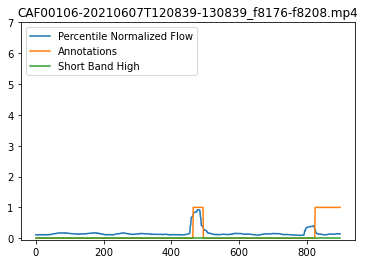

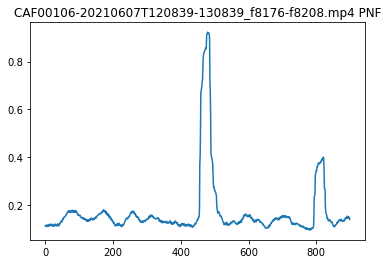

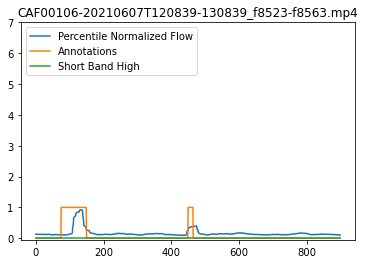

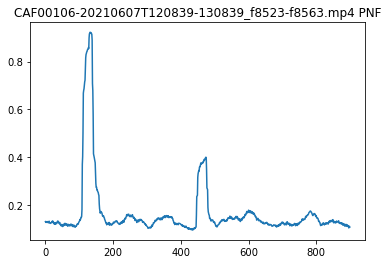

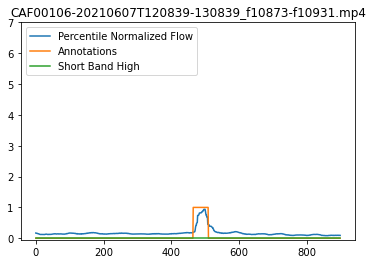

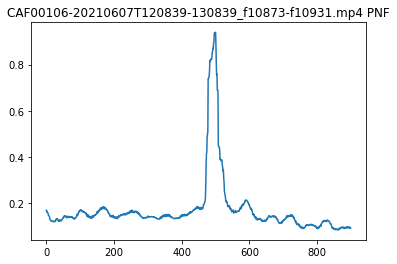

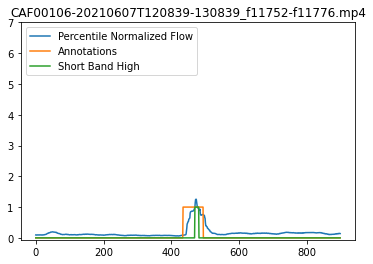

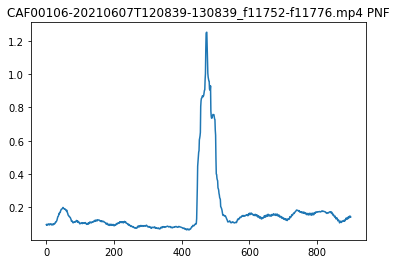

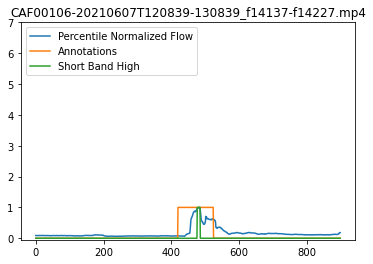

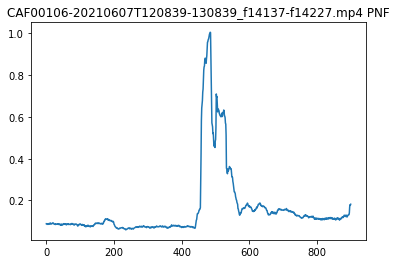

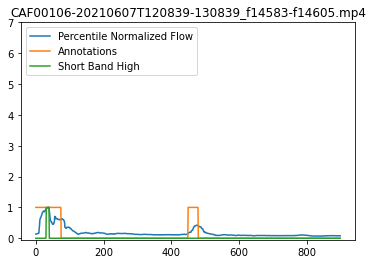

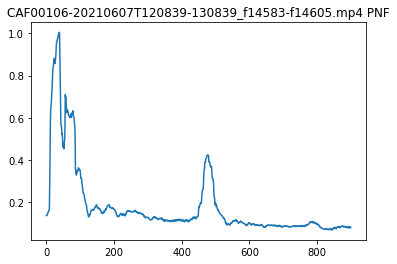

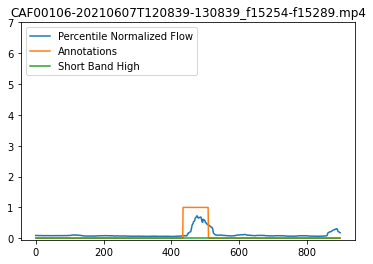

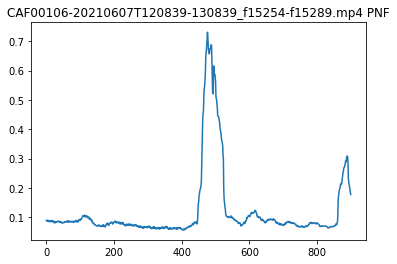

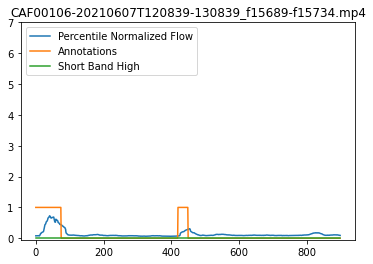

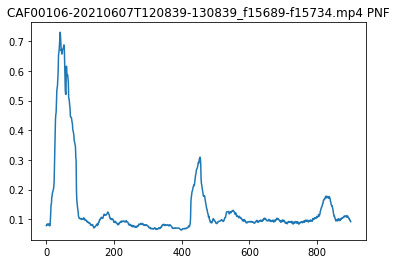

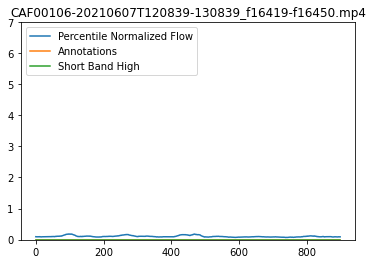

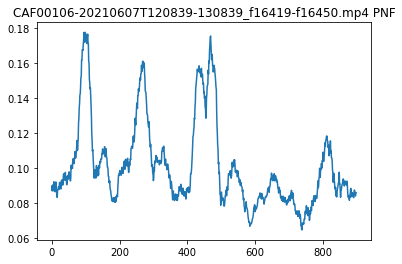

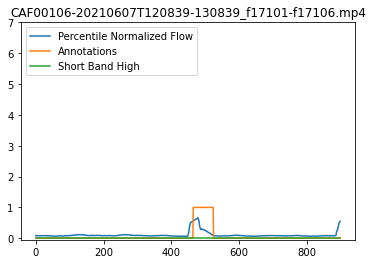

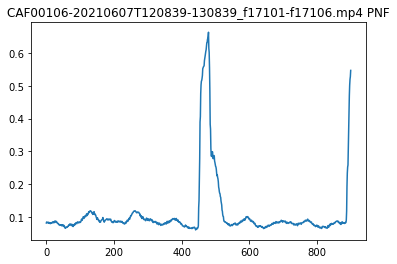

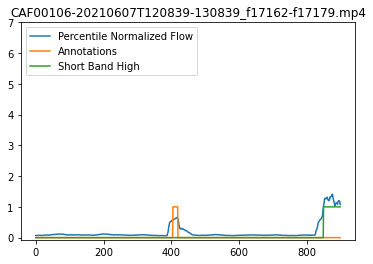

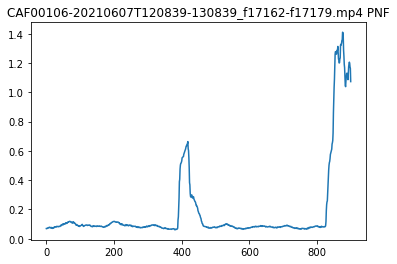

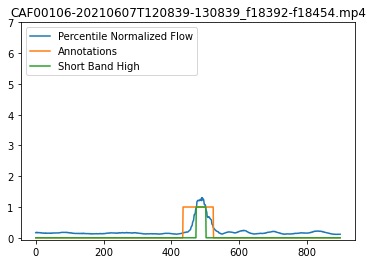

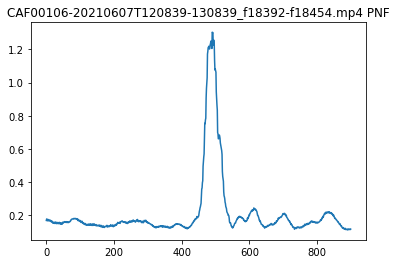

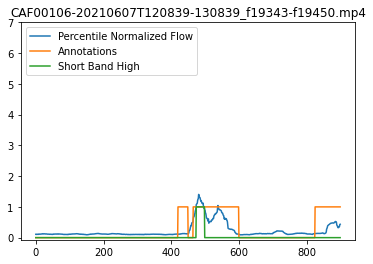

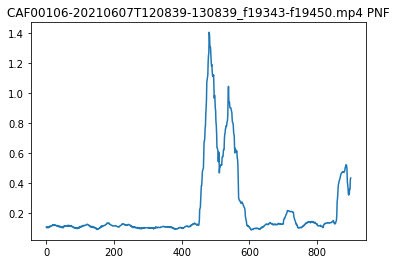

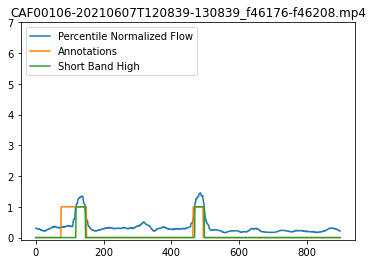

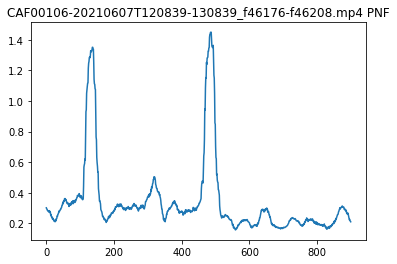

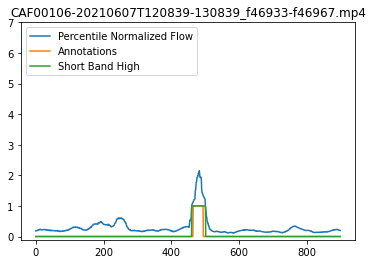

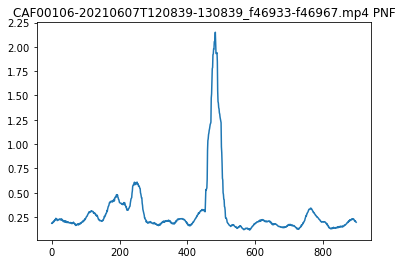

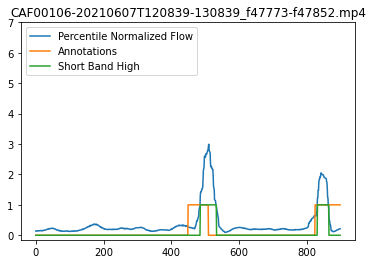

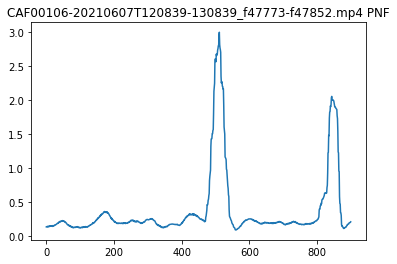

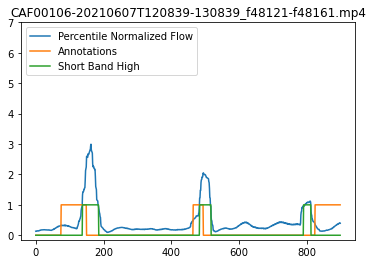

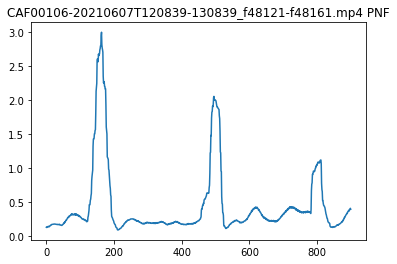

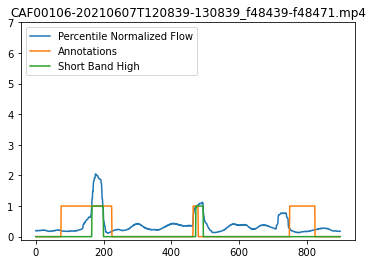

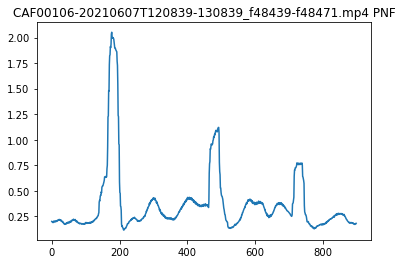

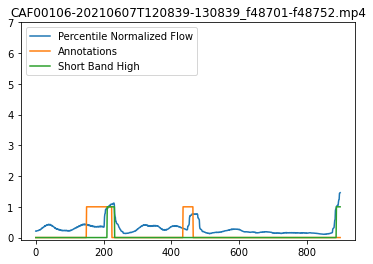

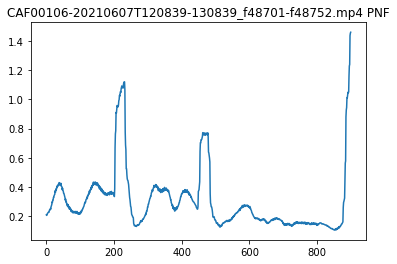

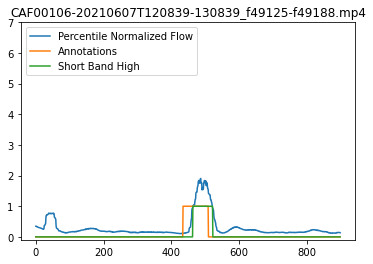

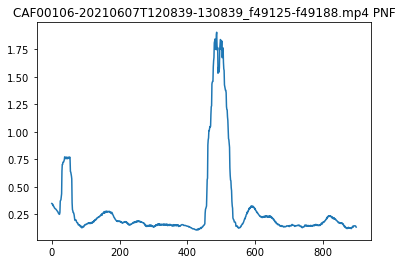

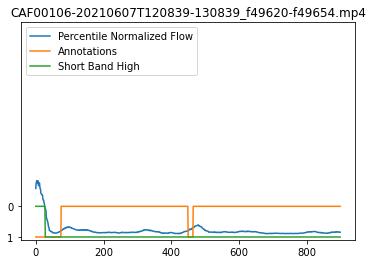

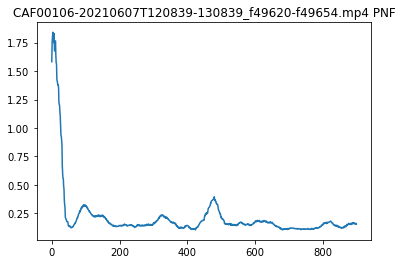

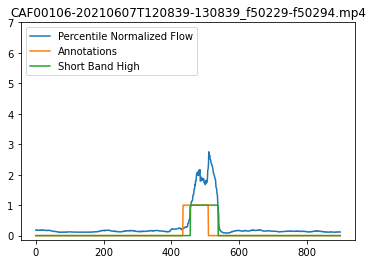

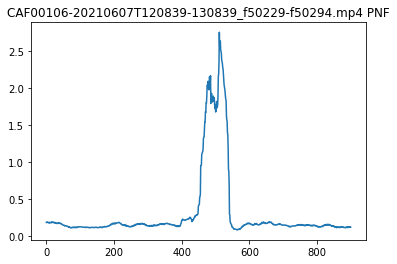

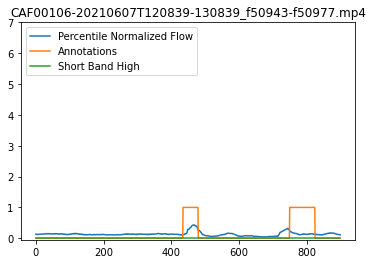

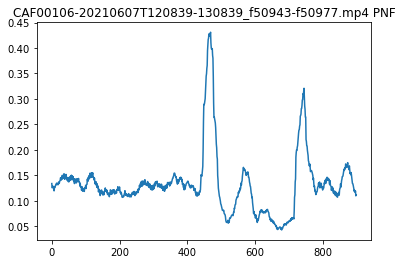

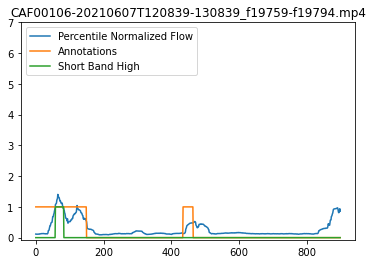

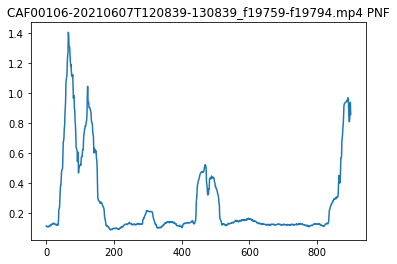

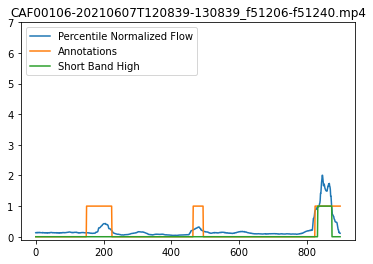

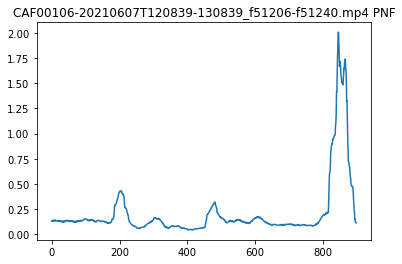

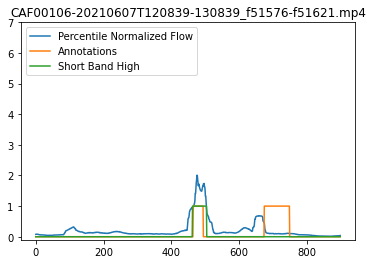

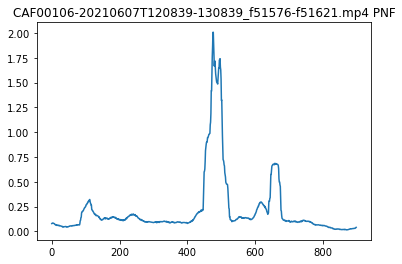

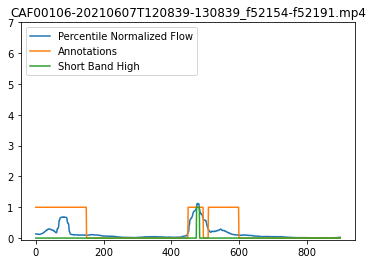

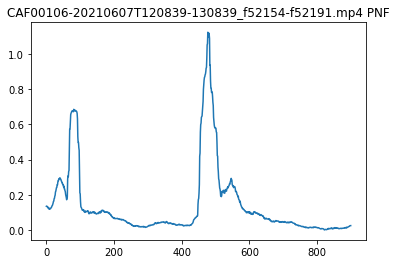

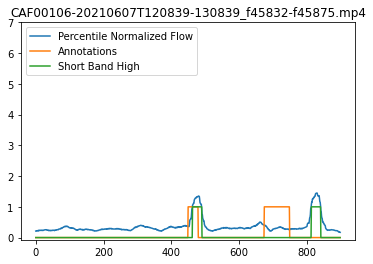

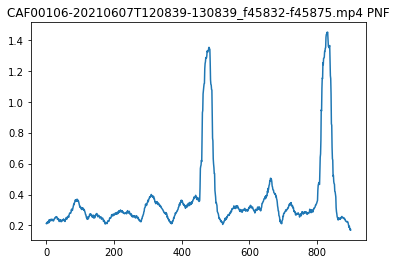

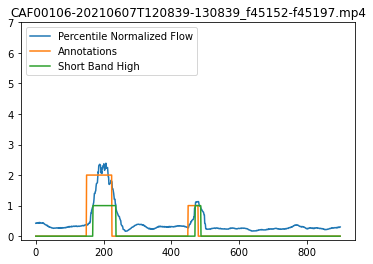

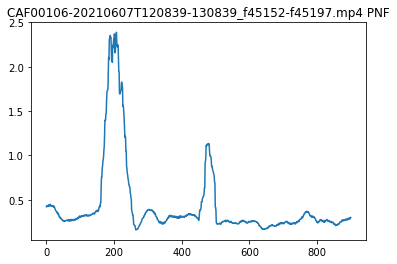

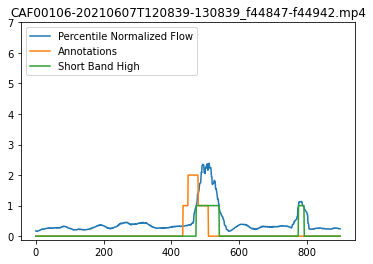

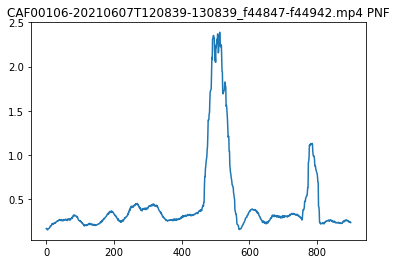

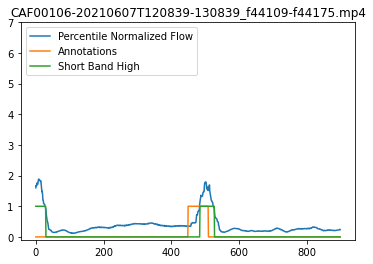

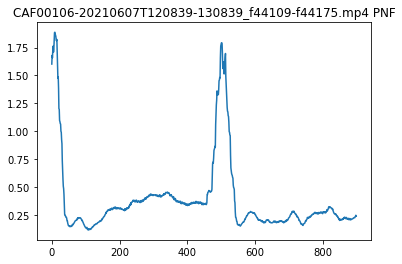

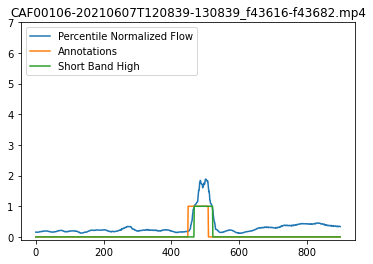

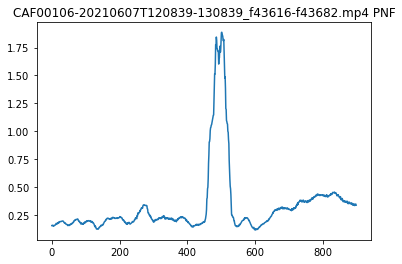

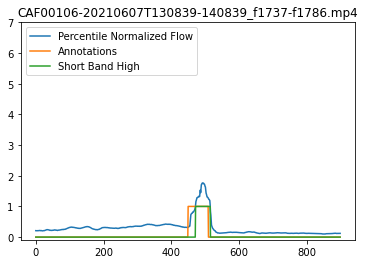

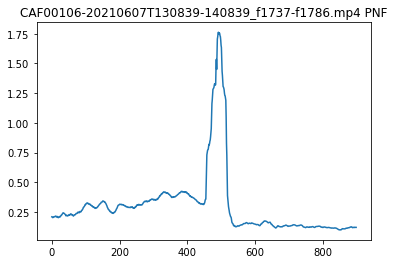

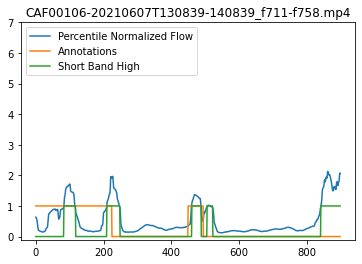

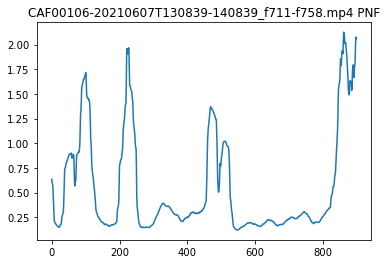

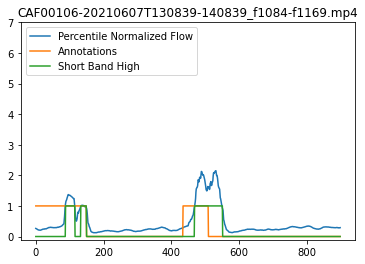

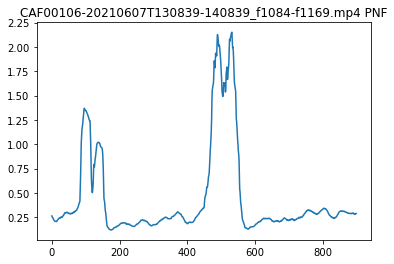

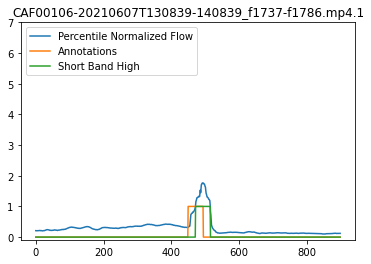

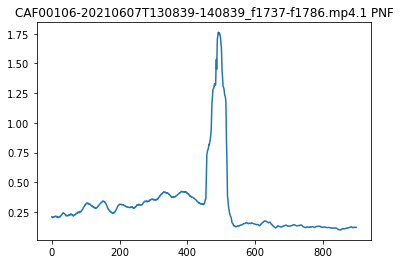

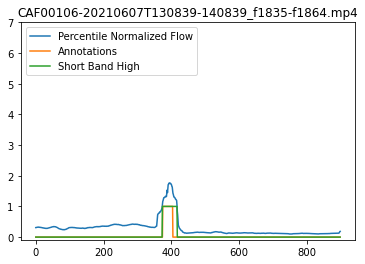

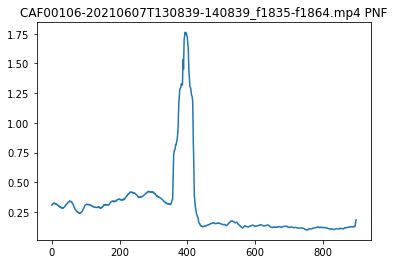

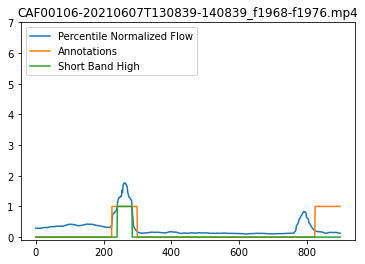

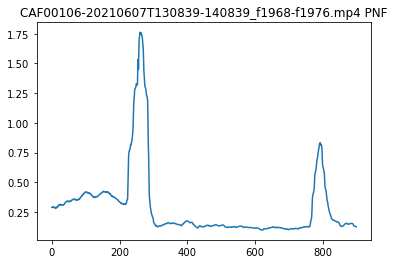

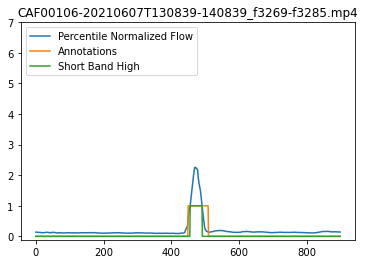

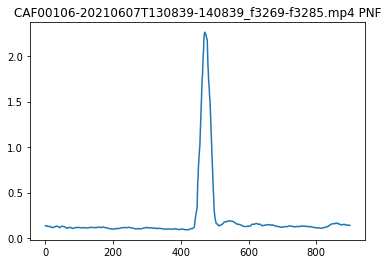

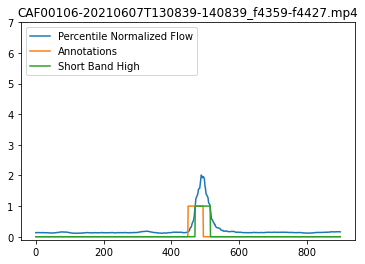

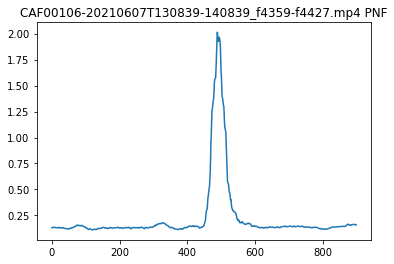

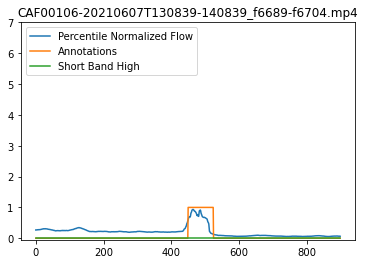

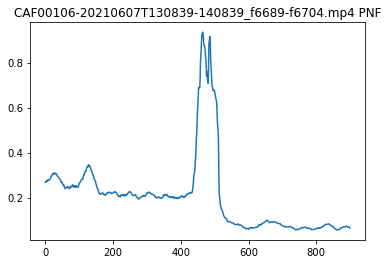

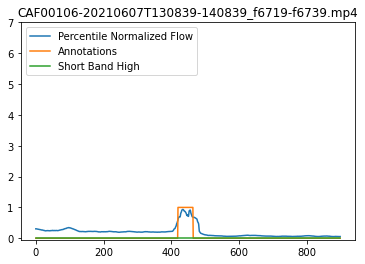

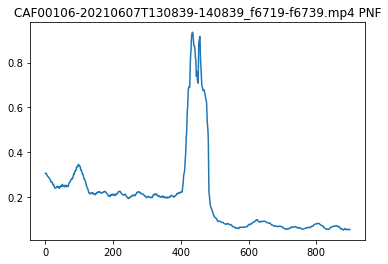

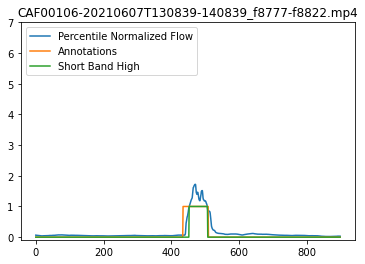

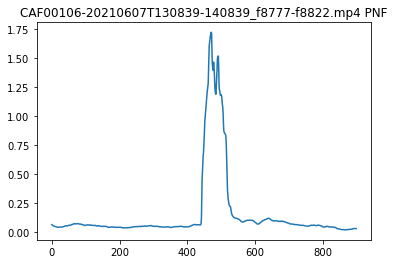

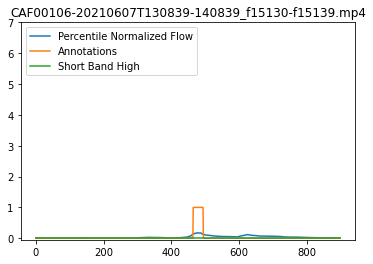

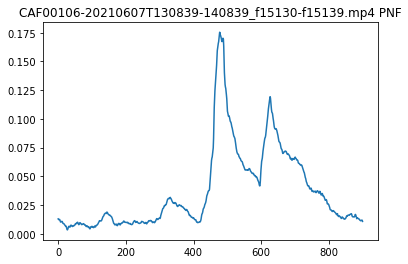

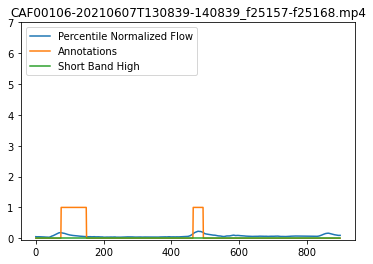

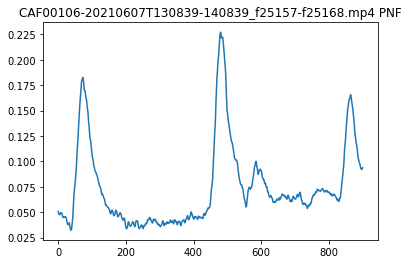

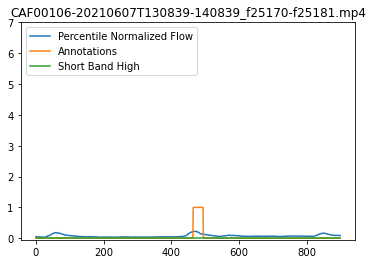

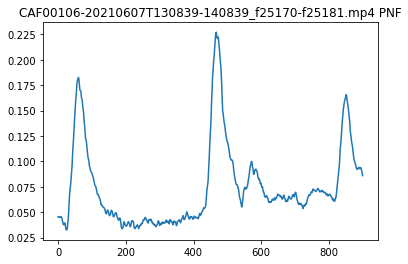

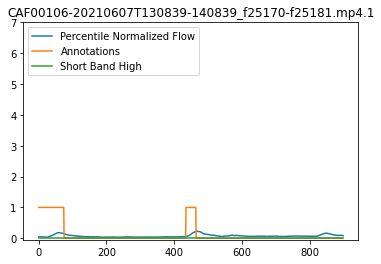

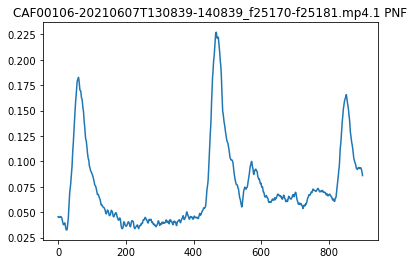

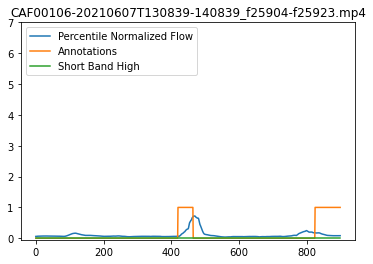

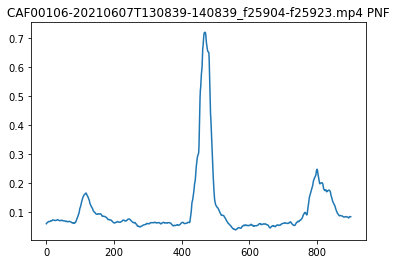

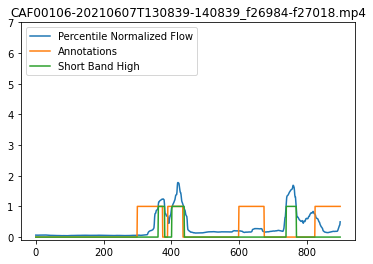

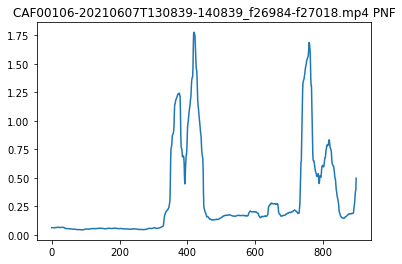

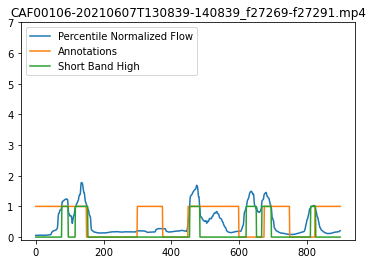

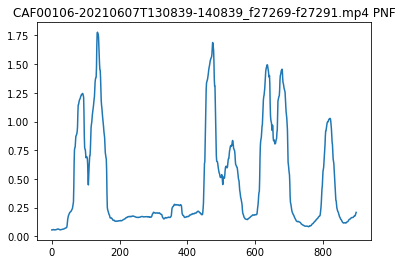

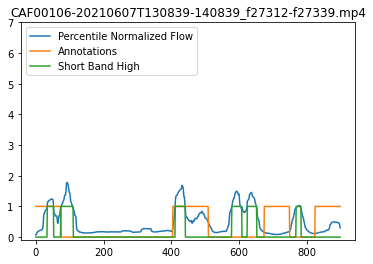

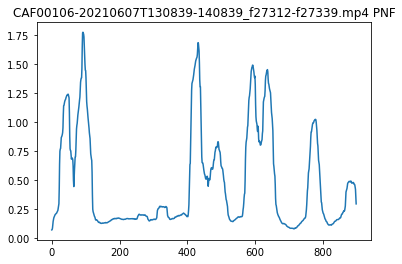

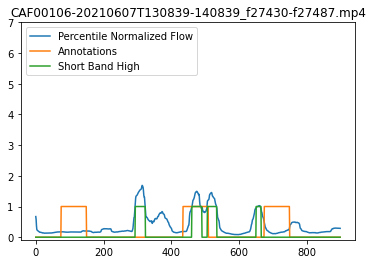

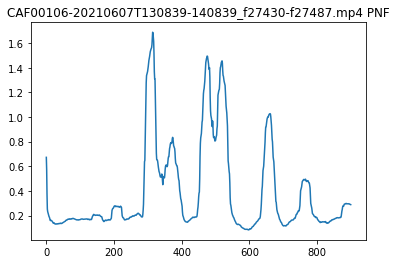

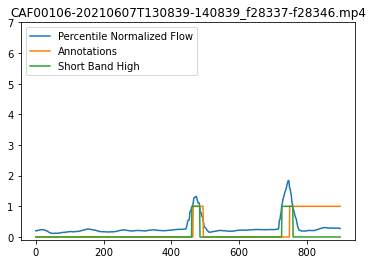

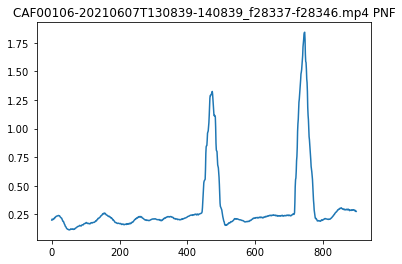

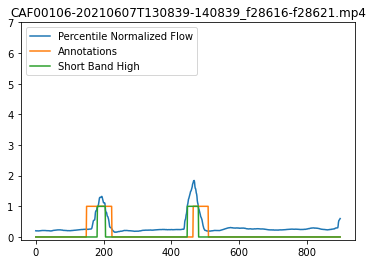

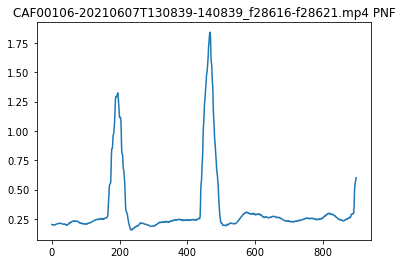

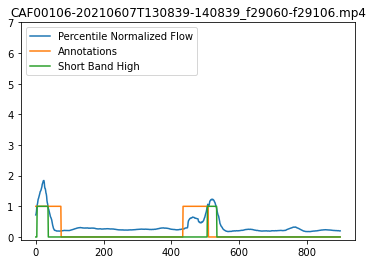

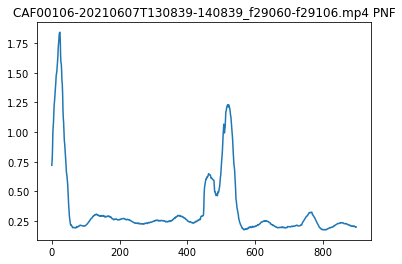

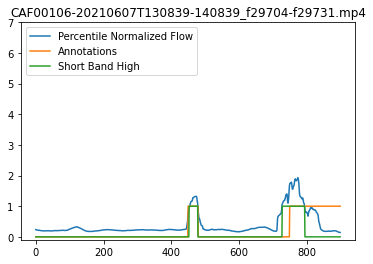

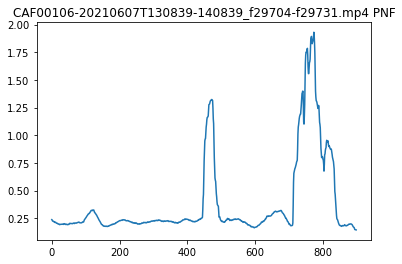

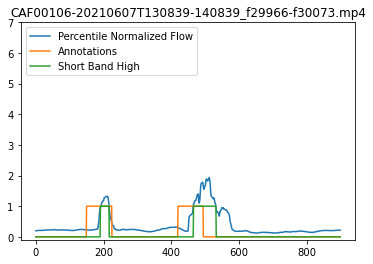

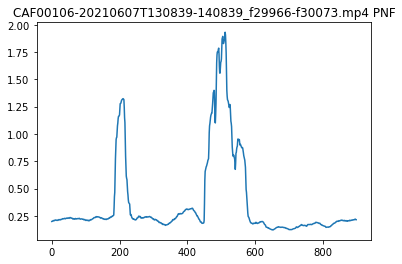

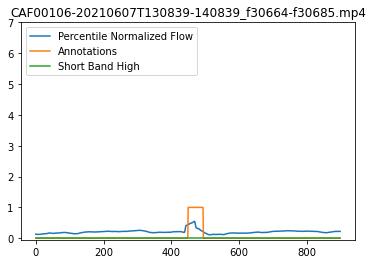

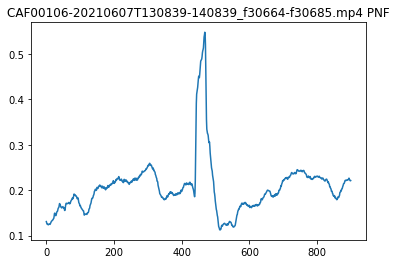

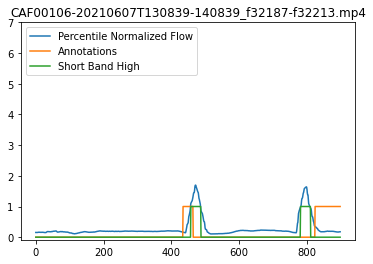

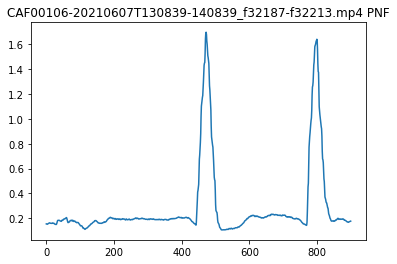

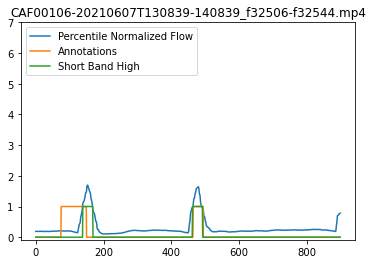

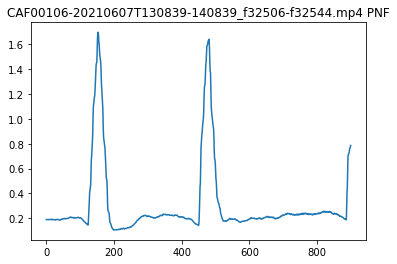

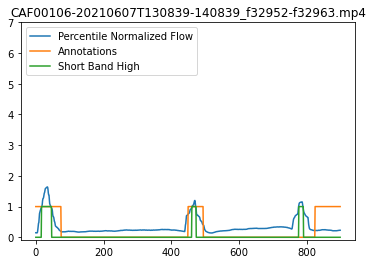

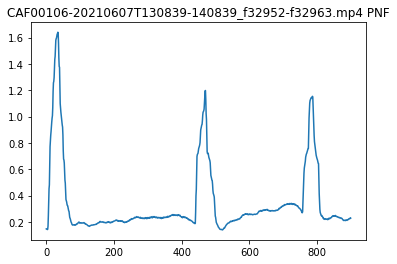

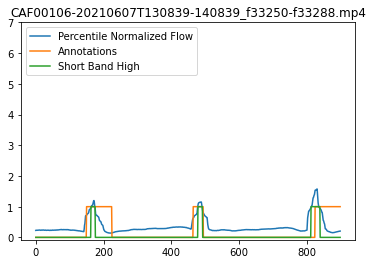

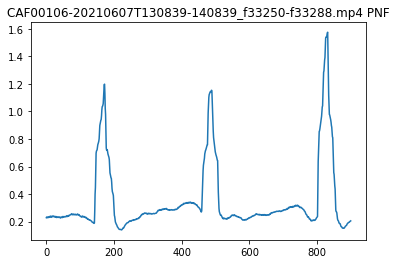

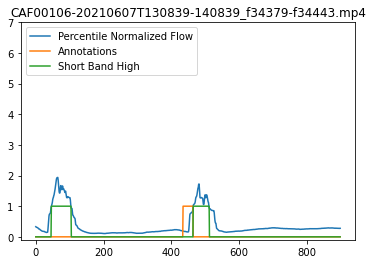

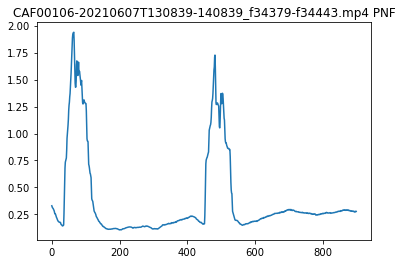

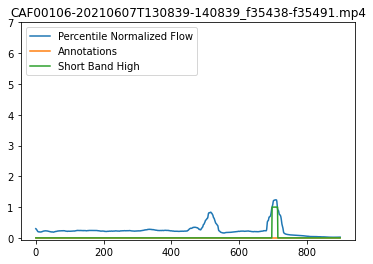

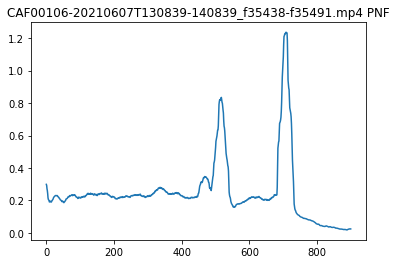

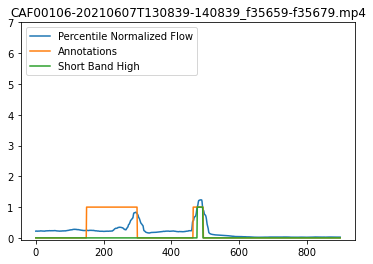

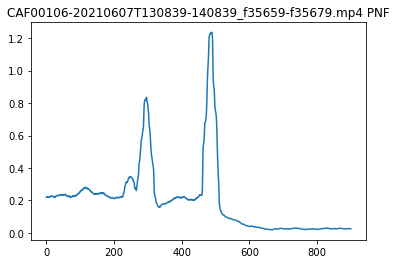

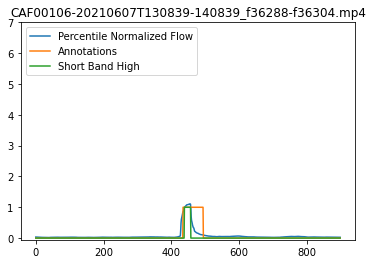

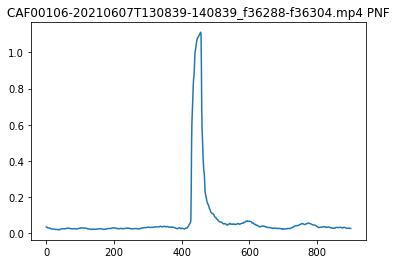

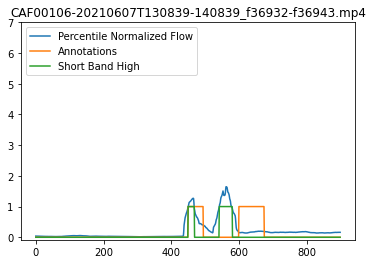

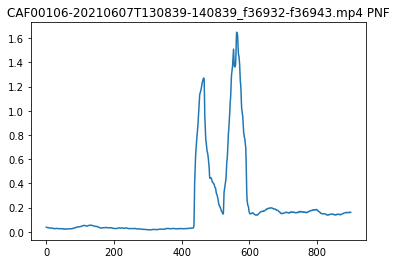

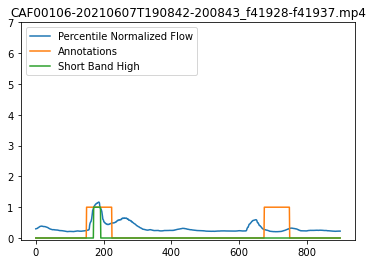

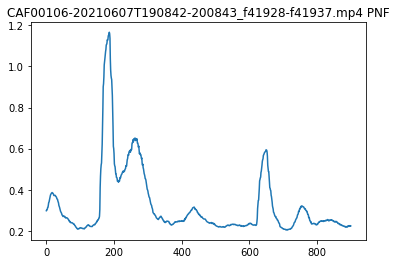

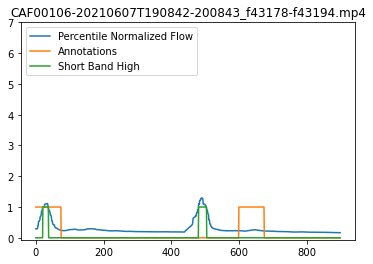

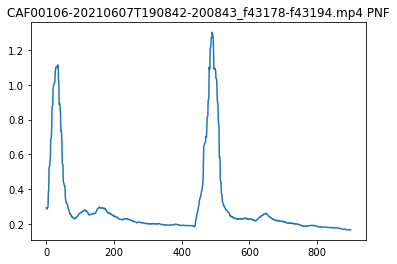

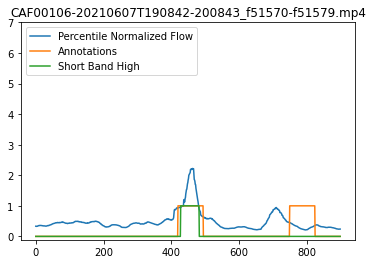

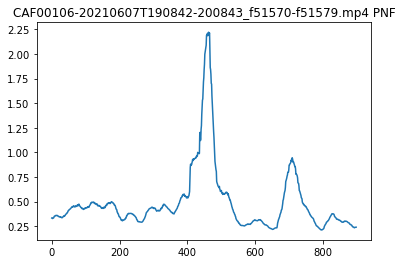

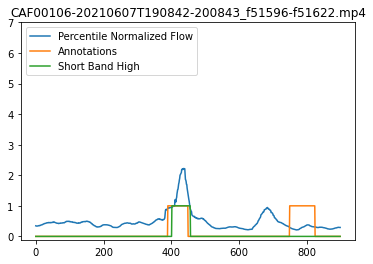

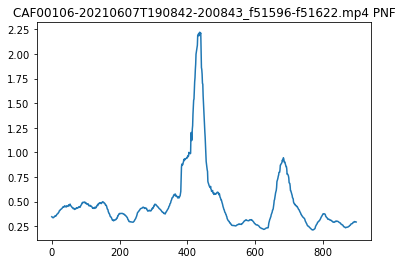

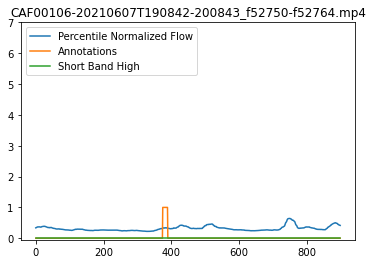

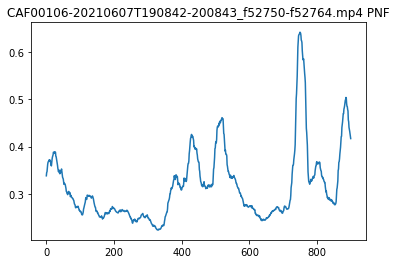

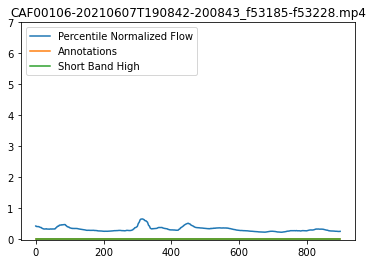

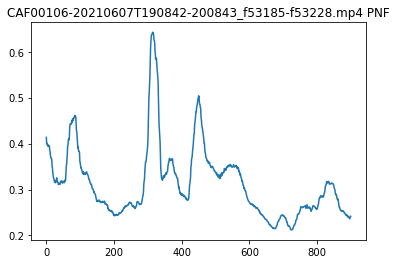

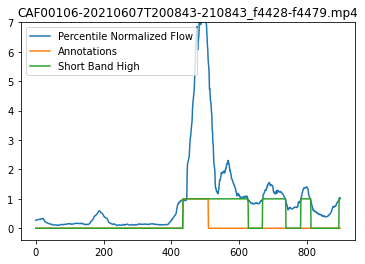

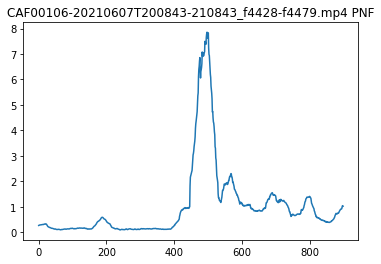

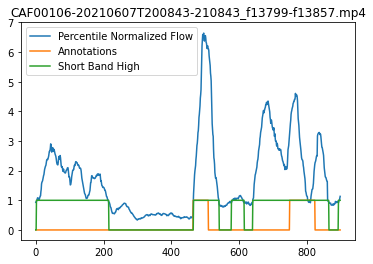

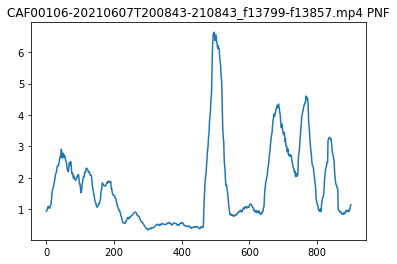

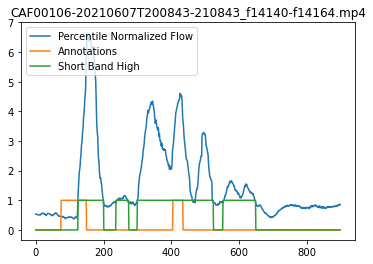

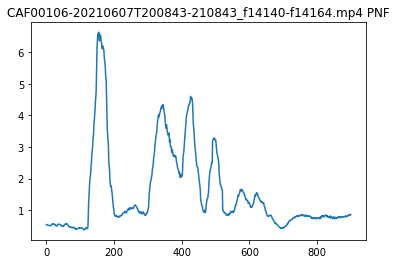

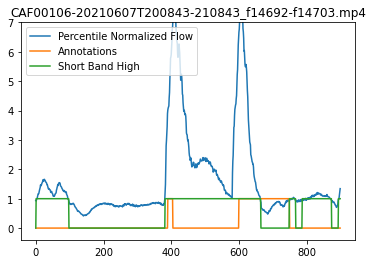

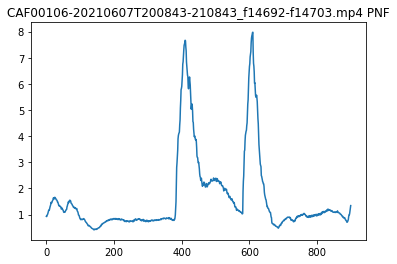

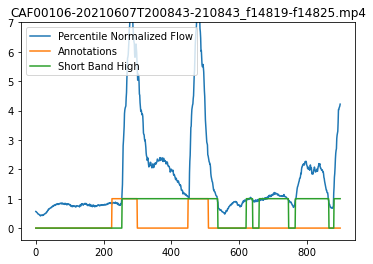

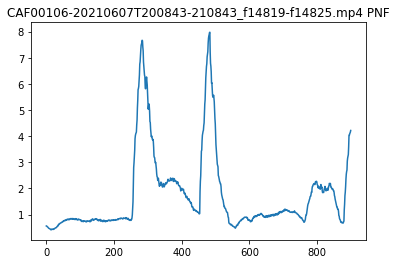

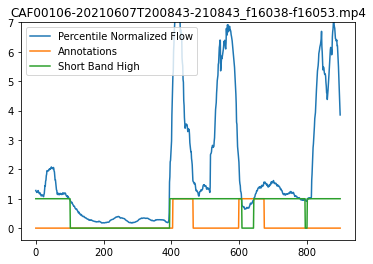

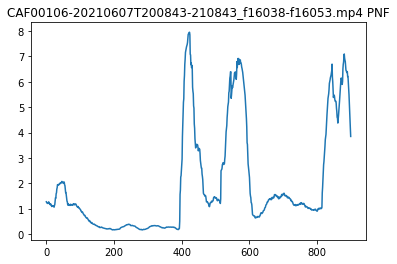

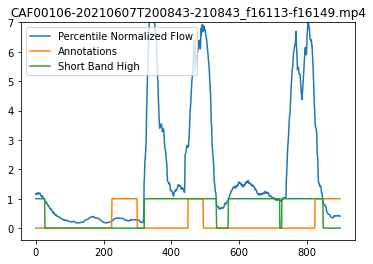

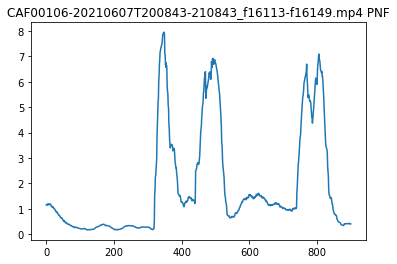

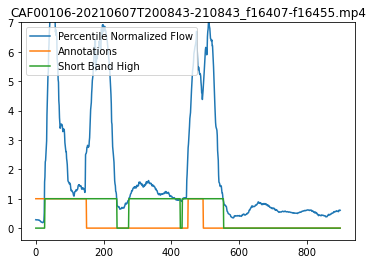

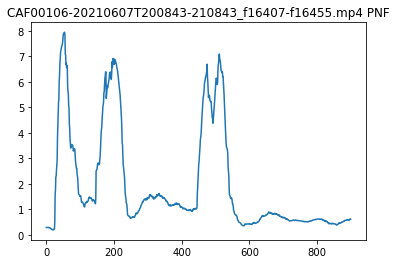

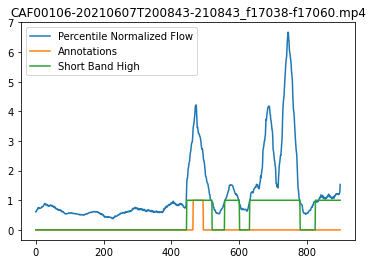

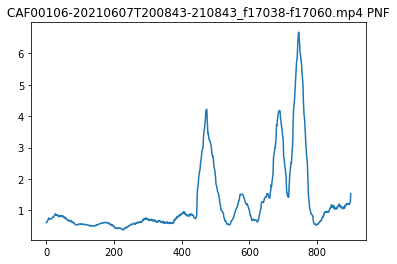

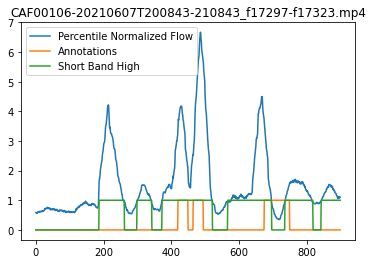

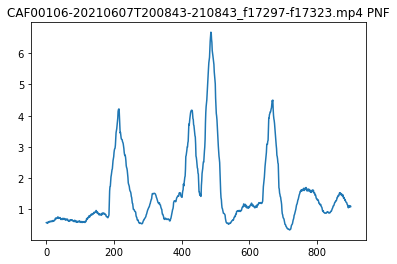

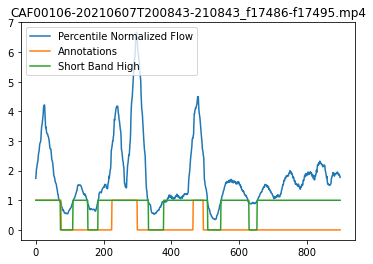

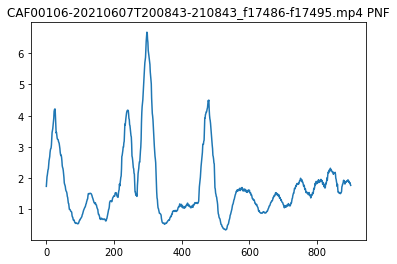

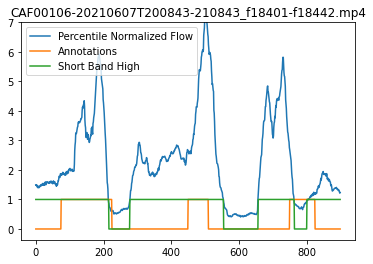

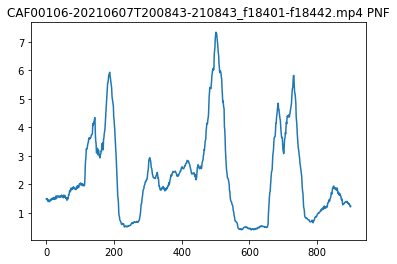

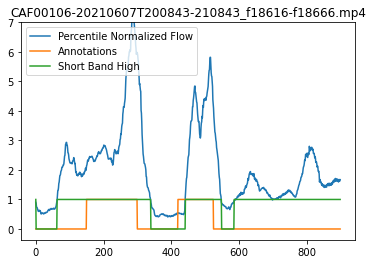

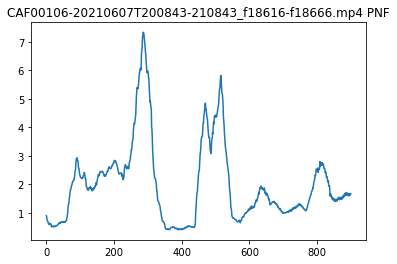

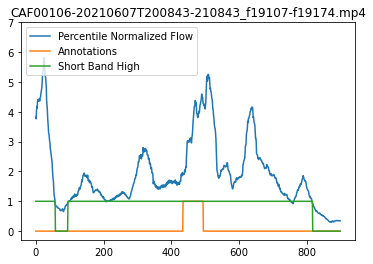

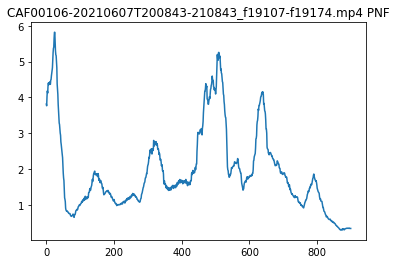

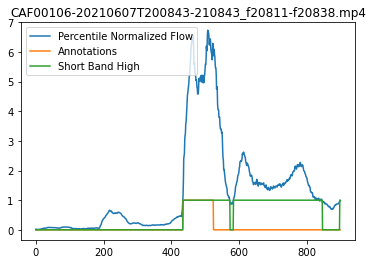

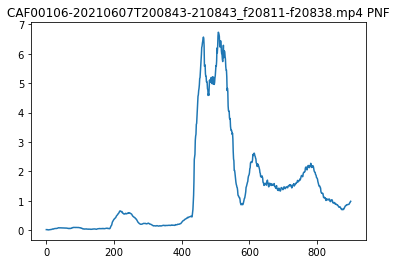

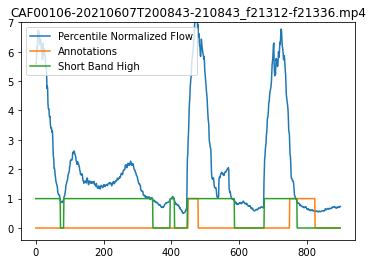

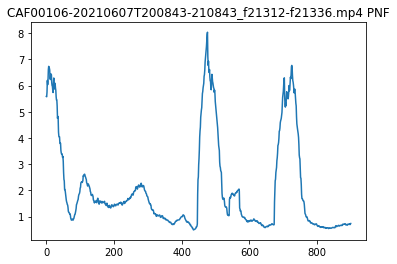

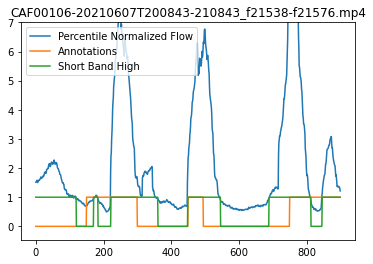

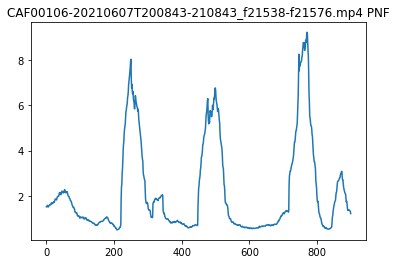

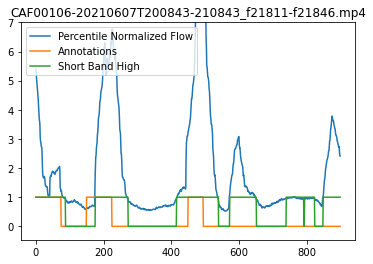

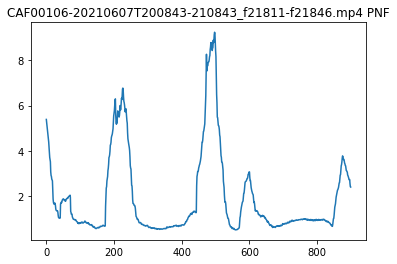

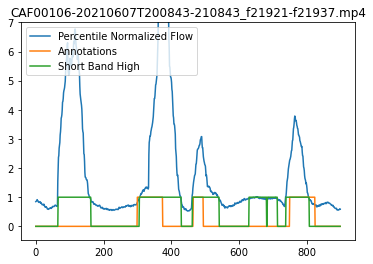

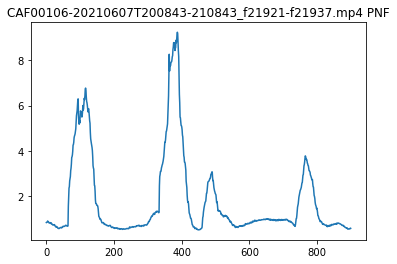

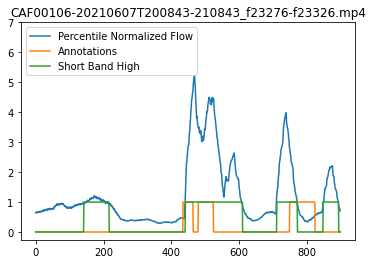

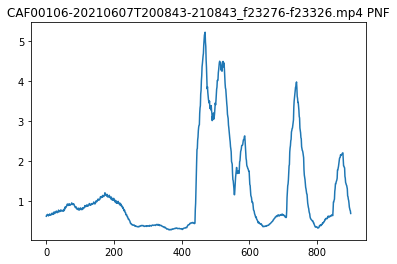

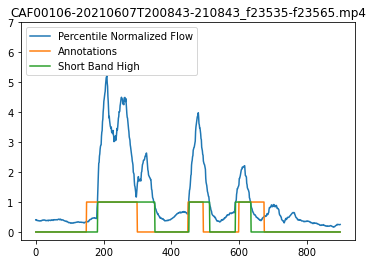

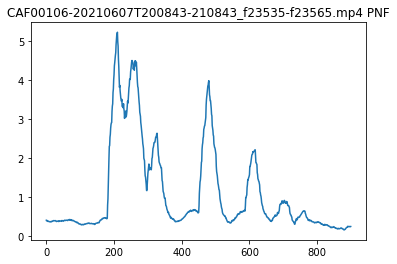

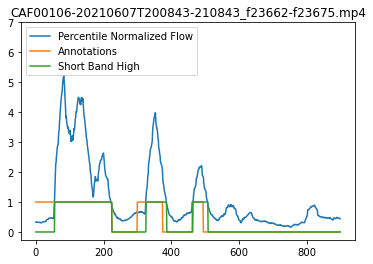

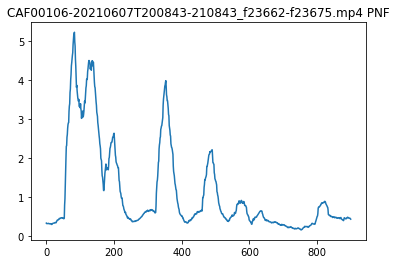

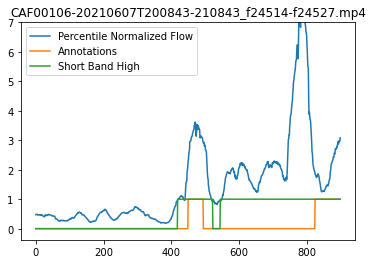

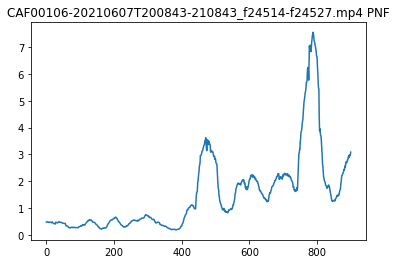

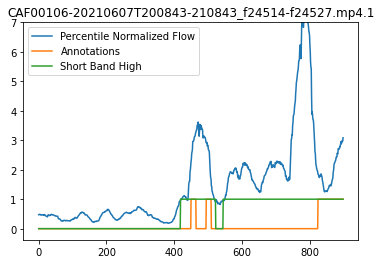

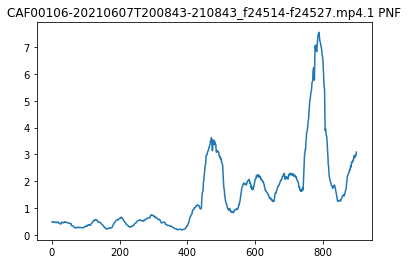

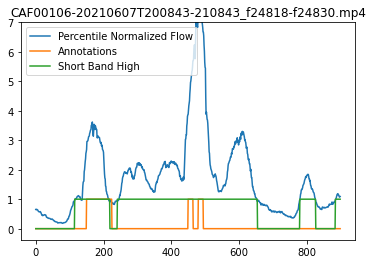

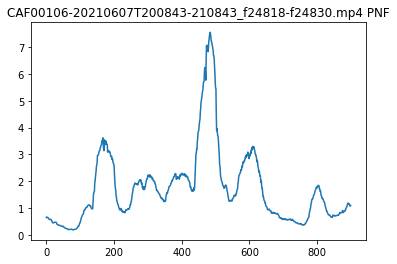

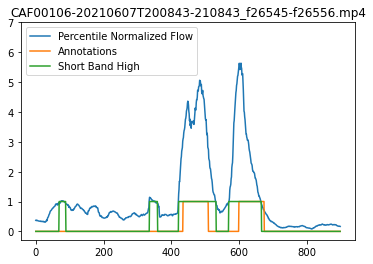

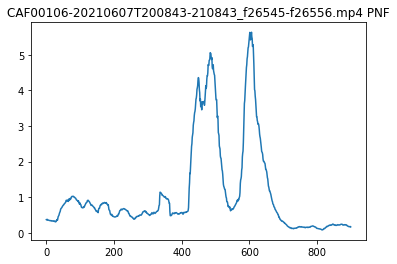

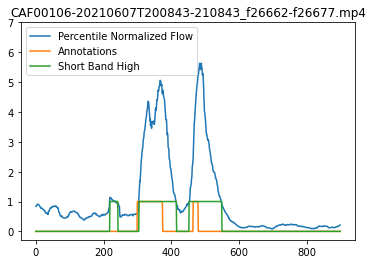

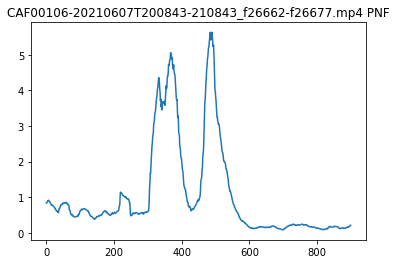

In [164]:
for i, unique_video in enumerate(np.unique(video_names)):
    flow, ant, shortb, videos = combo_antof(of106_df, ant106_df, unique_video)

    for j in range(len(flow)):
        x = range(len(flow[j]))
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.plot(x, ant[j], label = "Annotations")
        plt.plot(x, shortb[j], label = "Short Band High ")
        plt.title(videos[j])
        ax = plt.gca()
        ax.set_ylim(top = 7)
        plt.legend(loc="upper left")

        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.title(videos[j] + " PNF")
    plt.show()

### Sensitivity + Specificity

In [41]:
#used later for sensitivity
videos_ant = []
videos_shortb = []

In [42]:
#combine hour long video flickers into one array w/ 2 categorized to be same as 1
def flatten_flickers(video_name, of_df, ant_df):
    __, ant, shortb, __ = combo_antof(of_df, ant_df, video_name)
    
    video_ant = []
    video_shortb = []
    
    for j in range(len(ant)):
        ant[j] = [float(1) if x==float(2) else x for x in ant[j]]
        
        video_ant.extend(ant[j])
        video_shortb.extend(shortb[j])
    return video_ant, video_shortb

In [43]:
def binary_flickers(video_name, of_df, ant_df):
    __, ant, shortb, ind_videos = combo_antof(of_df, ant_df, video_name)
    
    for j in range(len(ant)):
        ant[j] = [float(1) if x==float(2) else x for x in ant[j]]
    
    return ant, shortb, ind_videos

In [44]:
#correlation between annotations + short band
for i, unique_video in enumerate(np.unique(video_names)):
    video_ant, video_shortb = flatten_flickers(unique_video, of106_df, ant106_df)
    
    videos_ant.extend(video_ant)
    videos_shortb.extend(video_shortb)
    
    print(unique_video)
    print(stats.pearsonr(np.asarray(video_ant).astype(float),np.asarray(video_shortb).astype(float)))
print(stats.pearsonr(np.asarray(videos_ant).astype(float),np.asarray(videos_shortb).astype(float)))

CAF00106-20210607T120839-130839
(0.3217244229881533, 0.0)
CAF00106-20210607T130839-140839
(0.2924486690293292, 0.0)
CAF00106-20210607T190842-200843
(0.40900594551092273, 6.9536013143203164e-217)
CAF00106-20210607T200843-210843
(0.23884786758230955, 2.52937973759e-312)
(0.24702065853041805, 0.0)


In [45]:
#sensitivity test
videos_ant = np.asarray(videos_ant).astype(float)
videos_shortb = np.asarray(videos_shortb).astype(float)

In [46]:
#only works for np arrays
def sens_calc(ant, shortb):
    ant = np.where(ant == 0.0, -1.0, ant)
    return (np.count_nonzero(np.equal(ant, shortb)))/np.sum(ant > 0)

In [47]:
#works with np or lists
def verify_sens(ant, shortb):
    length = len(ant)
    sens = np.zeros(length)
    
    for i in range(length):
        if ant[i] == 1 and ant[i] == shortb[i]:
            sens[i] = 1
    
    if (np.count_nonzero(ant) == 0):
        return -1.0
    return (np.count_nonzero(sens))/np.count_nonzero(ant)

In [48]:
#sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, of106_df, ant106_df)
    print(sens_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
#print(verify_sens(videos_ant, videos_shortb))

0.21174743024963288
0.23073593073593074
0.235
0.7930313588850174


In [49]:
#sensitivity for individual flickers
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of106_df, ant106_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(verify_sens(flicker_ant[k], flicker_shortb[k]))

CAF00106-20210607T120839-130839_f8176-f8208.mp4
0.0
CAF00106-20210607T120839-130839_f8523-f8563.mp4
0.0
CAF00106-20210607T120839-130839_f10873-f10931.mp4
0.0
CAF00106-20210607T120839-130839_f11752-f11776.mp4
0.2
CAF00106-20210607T120839-130839_f14137-f14227.mp4
0.08571428571428572
CAF00106-20210607T120839-130839_f14583-f14605.mp4
0.08571428571428572
CAF00106-20210607T120839-130839_f15254-f15289.mp4
0.0
CAF00106-20210607T120839-130839_f15689-f15734.mp4
0.0
CAF00106-20210607T120839-130839_f16419-f16450.mp4
-1.0
CAF00106-20210607T120839-130839_f17101-f17106.mp4
0.0
CAF00106-20210607T120839-130839_f17162-f17179.mp4
0.0
CAF00106-20210607T120839-130839_f18392-f18454.mp4
0.32222222222222224
CAF00106-20210607T120839-130839_f19343-f19450.mp4
0.10416666666666667
CAF00106-20210607T120839-130839_f46176-f46208.mp4
0.5047619047619047
CAF00106-20210607T120839-130839_f46933-f46967.mp4
1.0
CAF00106-20210607T120839-130839_f47773-f47852.mp4
0.42962962962962964
CAF00106-20210607T120839-130839_f48121-f4816

In [50]:
#finds groups + returns their indexes in given array
from itertools import groupby
from collections import defaultdict

def find_groups(arr):
    i = 0
    result = defaultdict(list)
    for k, g in groupby(arr):
        elems = len(list(g))
        result[k].append((i, i+elems-1))
        i += elems
    
    return result

In [51]:
#sensitivity based on there being at least one 1 in interval 
def overlap_sens(ant, shortb):
    group_ones = find_groups(ant).get(1)

    overlap = np.zeros(len(ant))
    
    if(group_ones != None):
        for idx in range(len(group_ones)):
            start_idx = group_ones[idx][0]
            end_idx = group_ones[idx][1]
            if 1 in shortb[start_idx : end_idx]:
                overlap[start_idx : end_idx] = 1
    else:
        return None
    
#     return overlap
    return (np.count_nonzero(overlap))/np.count_nonzero(ant)

In [52]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, of106_df, ant106_df)
    print(overlap_sens(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
#print(overlap_sens(videos_ant, videos_shortb))

0.5600587371512482
0.6699134199134199
0.4683333333333333
0.9688734030197445


In [53]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of106_df, ant106_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        sens = overlap_sens(flicker_ant[k], flicker_shortb[k])
        print(sens)
        values.append(sens)

CAF00106-20210607T120839-130839_f8176-f8208.mp4
0.0
CAF00106-20210607T120839-130839_f8523-f8563.mp4
0.0
CAF00106-20210607T120839-130839_f10873-f10931.mp4
0.0
CAF00106-20210607T120839-130839_f11752-f11776.mp4
0.9833333333333333
CAF00106-20210607T120839-130839_f14137-f14227.mp4
0.9904761904761905
CAF00106-20210607T120839-130839_f14583-f14605.mp4
0.7047619047619048
CAF00106-20210607T120839-130839_f15254-f15289.mp4
0.0
CAF00106-20210607T120839-130839_f15689-f15734.mp4
0.0
CAF00106-20210607T120839-130839_f16419-f16450.mp4
None
CAF00106-20210607T120839-130839_f17101-f17106.mp4
0.0
CAF00106-20210607T120839-130839_f17162-f17179.mp4
0.0
CAF00106-20210607T120839-130839_f18392-f18454.mp4
0.9888888888888889
CAF00106-20210607T120839-130839_f19343-f19450.mp4
0.5583333333333333
CAF00106-20210607T120839-130839_f46176-f46208.mp4
0.9809523809523809
CAF00106-20210607T120839-130839_f46933-f46967.mp4
0.9666666666666667
CAF00106-20210607T120839-130839_f47773-f47852.mp4
0.9851851851851852
CAF00106-20210607T1

In [54]:
#specificity
def spec_calc(ant, shortb):
    ant_zero = set()
    shortb_zero = set()
    
    for i in range(len(ant)):
        if ant[i] == 0:
            ant_zero.add(i)
        if shortb[i] == 0:
            shortb_zero.add(i)
            
    return len(ant_zero.intersection(shortb_zero))/len(ant)

In [55]:
#specificity for flicker videos
for i, unique_video in enumerate(np.unique(video_names)):
    flicker_ant, flicker_shortb, flicker = binary_flickers(unique_video, of106_df, ant106_df)
    
    for k in range(len(flicker_ant)):
        print(flicker[k])
        print(spec_calc(flicker_ant[k], flicker_shortb[k]))

CAF00106-20210607T120839-130839_f8176-f8208.mp4
0.8833333333333333
CAF00106-20210607T120839-130839_f8523-f8563.mp4
0.9
CAF00106-20210607T120839-130839_f10873-f10931.mp4
0.95
CAF00106-20210607T120839-130839_f11752-f11776.mp4
0.9333333333333333
CAF00106-20210607T120839-130839_f14137-f14227.mp4
0.8833333333333333
CAF00106-20210607T120839-130839_f14583-f14605.mp4
0.8833333333333333
CAF00106-20210607T120839-130839_f15254-f15289.mp4
0.9166666666666666
CAF00106-20210607T120839-130839_f15689-f15734.mp4
0.8833333333333333
CAF00106-20210607T120839-130839_f16419-f16450.mp4
1.0
CAF00106-20210607T120839-130839_f17101-f17106.mp4
0.9333333333333333
CAF00106-20210607T120839-130839_f17162-f17179.mp4
0.9277777777777778
CAF00106-20210607T120839-130839_f18392-f18454.mp4
0.9
CAF00106-20210607T120839-130839_f19343-f19450.mp4
0.7333333333333333
CAF00106-20210607T120839-130839_f46176-f46208.mp4
0.88
CAF00106-20210607T120839-130839_f46933-f46967.mp4
0.9544444444444444
CAF00106-20210607T120839-130839_f47773-f47

### Creating New Threshold + Median Filter Parameters

In [144]:
#median filter on normalized OF
def median_filter(filter_length, video_name):
    ref_df = of_df[of_df['video_filename'] == (video_name) + ".mp4"]
    return scipy.signal.medfilt(ref_df['percentile_normalized_flow'].values, filter_length)

In [145]:
#is in high activity
def is_in_hact(threshold_value, median_filter):
    is_in = []
    for i in range(len(median_filter)):
        if median_filter[i] >= threshold_value:
            is_in.append(True) 
        else:
            is_in.append(False)
    return is_in

In [146]:
#consolidate to create new dataframe
comp_names = []
comp_median = []
comp_hact = []

for i, unique_video in enumerate(np.unique(video_names)):
    med_fil = median_filter(5, unique_video)
    is_in = is_in_hact(0.4, med_fil)
    
    comp_median.extend(med_fil)
    comp_hact.extend(is_in)
    arr_names = np.full(shape = len(med_fil), fill_value = unique_video + ".mp4")
    comp_names.extend(arr_names)

adjust_cols = {'video_filename' : comp_names, 'percentile_normalized_flow' : comp_median, 'is_in_short_band_high_activity' : comp_hact}
adjust_df = pd.DataFrame(data=adjust_cols)

In [147]:
adjust_df

video_filename  percentile_normalized_flow  \
0       CAF00106-20210607T120839-130839.mp4                    0.180242   
1       CAF00106-20210607T120839-130839.mp4                    0.180790   
2       CAF00106-20210607T120839-130839.mp4                    0.180790   
3       CAF00106-20210607T120839-130839.mp4                    0.180790   
4       CAF00106-20210607T120839-130839.mp4                    0.174288   
...                                     ...                         ...   
216012  CAF00106-20210607T200843-210843.mp4                    0.268499   
216013  CAF00106-20210607T200843-210843.mp4                    0.267172   
216014  CAF00106-20210607T200843-210843.mp4                    0.262665   
216015  CAF00106-20210607T200843-210843.mp4                    0.189932   
216016  CAF00106-20210607T200843-210843.mp4                    0.104131   

        is_in_short_band_high_activity  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
216012                           False  
216013                           False  
216014                           False  
216015                           False  
216016                           False  

[216017 rows x 3 columns]

In [128]:
#sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant106_df)
    print(sens_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))

0.4977973568281938
0.47424242424242424
0.43
0.9554006968641114


In [129]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant106_df)
    print(overlap_sens(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))
    
#for video 4, the sensitivity is so high bc the is_in lasts a fairly long time, increasing the likelihood of it overlapping is extremely high
#for video 3, there is almost no correlation?
#both videos have the mouse in the corner for the entire stretch

0.8372980910425845
0.785064935064935
0.5916666666666667
0.9688734030197445


In [130]:
#specificity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    ant, shortb = flatten_flickers(unique_video, adjust_df, ant106_df)
    print(spec_calc(np.asarray(ant).astype(float), np.asarray(shortb).astype(float)))

0.8297222222222222
0.7876190476190477
0.6746296296296296
0.11950617283950617


### In Frame + Out of Frame

In [199]:
oof_path = '/Users/graciezhang/Documents/Hengen-Lab/Hengen-Lab-Work/Data/out_of_frame - CAF106_org.csv'

In [200]:
df_oof = pd.read_csv(oof_path)
df_oof.fillna(-1)

CAF00106-20210607T120839-130839.mp4 CAF00106-20210607T130839-140839.mp4  \
0                            26:48:00                             0:00:00   
1                            27:07:00                            52:26:00   
2                            44:50:00                            53:05:00   
3                            45:22:00                            59:50:00   
4                            45:35:00                            59:54:00   
5                            45:44:00                            59:56:00   
6                            46:23:00                                  -1   
7                            58:55:00                                  -1   
8                            59:00:00                                  -1   
9                             1:00:00                                  -1   

  CAF00106-20210607T190842-200843.mp4 CAF00106-20210607T200843-210843.mp4  
0                             0:00:00                             0:00:00  
1                             1:00:00                             1:00:00  
2                                  -1                                  -1  
3                                  -1                                  -1  
4                                  -1                                  -1  
5                                  -1                                  -1  
6                                  -1                                  -1  
7                                  -1                                  -1  
8                                  -1                                  -1  
9                                  -1                                  -1

In [206]:
def time_to_frames(col, of_df):
    frames = []
    time = col.values
    for j in range(0, len(time), 2):
        if type(time[j]) != float:
            start = time[j].split(":")
            end = time[j+1].split(":")
            to_frame_start = ((int)(start[0]) + (float)(start[1])/60) * 60 * 15
            to_frame_end = ((int)(end[0]) + (float)(end[1])/60) * 60 * 15
            
            if to_frame_end == 900:
                to_frame_end = len(of_df[of_df['video_filename'] == col.name])
                
            frames.append((int)(to_frame_start))
            frames.append((int)(to_frame_end))
    return frames

In [210]:
col = df_oof.columns.tolist()

for i in range(len(col)):
    print(time_to_frames(df_oof[col[i]], of106_df))

[24120, 24405, 40350, 40830, 41025, 41160, 41745, 53025, 53100, 54001]
[0, 47190, 47775, 53850, 53910, 53940]
[0, 54015]
[0, 54001]


In [24]:
for i, unique_names in enumerate(np.unique(video_names)):
    video = unique_names + ".mp4"
    #selects specific full length video in OF df
    of_analysis = of106_df[of106_df['video_filename'] == video]

    #chooses specific videos of one mouse in ANT df
    ant_analysis = ant106_df.filter(like=unique_names).columns

    complete_flow = []
    complete_ant = []
    complete_short = []
    
    #iterates through all flicker videos
    for idx, frames in enumerate(ant_analysis):
        sfv, efv = frames_range(of106_df, ant106_df, frames)
    
        if video in df_oof.columns:
            ant_range = range(sfv, efv)
            timestamps = time_to_frames(df_oof[video])
        
            for j in range(0, len(timestamps), 2):
                oof_range = range(timestamps[j], timestamps[j+1])
                inter = range(max(ant_range.start,oof_range.start), min(ant_range.stop,oof_range.stop)) or None
                
                if inter == None:
                    complete_flow.append(of106_df.iloc[sfv:efv]['percentile_normalized_flow'])
                    complete_ant.append(timestamp_to_frames(ant106_df[frames]))
                    complete_short.append(of106_df.iloc[sfv:efv]['is_in_short_band_high_activity'].values)
    

In [213]:
def overlap_antof(of_df, ant_df, df_oof, unique_names, in_or_out = True):
    in_frame = []
    out_frame = []
    
    video = unique_names + ".mp4"
    
    #selects specific full length video in OF df
    of_analysis = of_df[of_df['video_filename'] == video]

    #chooses specific videos of one mouse in ANT df
    ant_analysis = ant_df.filter(like=unique_names).columns

    complete_flow = []
    complete_ant = []
    complete_short = []
    
    #iterates through all flicker videos
    for idx, frames in enumerate(ant_analysis):
#         print("FLICKER:")
#         print(frames)
        sfv, efv = frames_range(of_df, ant_df, frames)
        check = True
        
        if video in df_oof.columns:
            ant_range = range(sfv, efv)
            timestamps = time_to_frames(df_oof[video], of_df)
#             print("ANNOTATIONS RANGE:")
#             print(ant_range)

        
            for j in range(0, len(timestamps), 2):
                oof_range = range(timestamps[j], timestamps[j+1])
                
#                 print("OOF RANGE:")
#                 print(oof_range)
                
                inter = range(max(ant_range.start,oof_range.start), min(ant_range.stop,oof_range.stop)) or None
#                 print("OVERLAP?")
#                 print(inter)
                if inter != None:
                    check = False
                    out_frame.append(frames)
                    if in_or_out == False:
                        complete_flow.append(of_analysis.iloc[sfv:efv]['percentile_normalized_flow'])
                        complete_ant.append(timestamp_to_frames(ant_df[frames]))
                        complete_short.append(of_analysis.iloc[sfv:efv]['is_in_short_band_high_activity'].values)
#                     print("OVERLAP!")
#                     print(inter)
#                     print(oof_range)
                    break
        
        if check == True:
#             print("NO OVERLAP!")
            in_frame.append(frames)
            if in_or_out == True:
                complete_flow.append(of_analysis.iloc[sfv:efv]['percentile_normalized_flow'])
                complete_ant.append(timestamp_to_frames(ant_df[frames]))
                complete_short.append(of_analysis.iloc[sfv:efv]['is_in_short_band_high_activity'].values)
            
    return complete_flow, complete_ant, complete_short, in_frame, out_frame

In [127]:
for i, unique_video in enumerate(cols):
    video = unique_video.split(".")[0]
    __, ant_over, shortb_over, in_frame, out_frame = overlap_antof(of106_df, ant106_df, df_oof, video)

FLICKER:
CAF00106-20210607T120839-130839_f8176-f8208.mp4
ANNOTATIONS RANGE:
range(7726, 8626)
OOF RANGE:
range(24120, 24405)
OOF RANGE:
range(40350, 40830)
OOF RANGE:
range(41025, 41160)
OOF RANGE:
range(41745, 53025)
OOF RANGE:
range(53100, 54000)
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f8523-f8563.mp4
ANNOTATIONS RANGE:
range(8073, 8973)
OOF RANGE:
range(24120, 24405)
OOF RANGE:
range(40350, 40830)
OOF RANGE:
range(41025, 41160)
OOF RANGE:
range(41745, 53025)
OOF RANGE:
range(53100, 54000)
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f10873-f10931.mp4
ANNOTATIONS RANGE:
range(10423, 11323)
OOF RANGE:
range(24120, 24405)
OOF RANGE:
range(40350, 40830)
OOF RANGE:
range(41025, 41160)
OOF RANGE:
range(41745, 53025)
OOF RANGE:
range(53100, 54000)
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f11752-f11776.mp4
ANNOTATIONS RANGE:
range(11302, 12202)
OOF RANGE:
range(24120, 24405)
OOF RANGE:
range(40350, 40830)
OOF RANGE:
range(41025, 41160)
OOF RANGE:
range(41745

In [191]:
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, in_frame, out_frame = overlap_antof(of106_df, ant106_df, df_oof, unique_video)

FLICKER:
CAF00106-20210607T120839-130839_f8176-f8208.mp4
ANNOTATIONS RANGE:
range(7726, 8626)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f8523-f8563.mp4
ANNOTATIONS RANGE:
range(8073, 8973)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f10873-f10931.mp4
ANNOTATIONS RANGE:
range(10423, 11323)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLI

FLICKER:
CAF00106-20210607T190842-200843_f41928-f41937.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f43178-f43194.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f51570-f51579.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f51596-f51622.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f52750-f52764.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f53185-f53228.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f4428-f4479.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f13799-f13857.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f14140-f14164.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f14692-f14703.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f14819-f14825.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f16038-f16053.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f16113-f16149.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f16407-f16455.mp4
NO OVERLAP!
FLICKER:

In [194]:
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, in_frame, out_frame = overlap_antof(of106_df, ant106_df, df_oof, unique_video)
    print(in_frame)
    print(out_frame)

FLICKER:
CAF00106-20210607T120839-130839_f8176-f8208.mp4
ANNOTATIONS RANGE:
range(7726, 8626)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f8523-f8563.mp4
ANNOTATIONS RANGE:
range(8073, 8973)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLICKER:
CAF00106-20210607T120839-130839_f10873-f10931.mp4
ANNOTATIONS RANGE:
range(10423, 11323)
OOF RANGE:
range(24120, 24405)
OVERLAP?
None
OOF RANGE:
range(40350, 40830)
OVERLAP?
None
OOF RANGE:
range(41025, 41160)
OVERLAP?
None
OOF RANGE:
range(41745, 53025)
OVERLAP?
None
OOF RANGE:
range(53100, 54000)
OVERLAP?
None
NO OVERLAP!
FLI

FLICKER:
CAF00106-20210607T190842-200843_f41928-f41937.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f43178-f43194.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f51570-f51579.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f51596-f51622.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f52750-f52764.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T190842-200843_f53185-f53228.mp4
NO OVERLAP!
['CAF00106-20210607T190842-200843_f41928-f41937.mp4', 'CAF00106-20210607T190842-200843_f43178-f43194.mp4', 'CAF00106-20210607T190842-200843_f51570-f51579.mp4', 'CAF00106-20210607T190842-200843_f51596-f51622.mp4', 'CAF00106-20210607T190842-200843_f52750-f52764.mp4', 'CAF00106-20210607T190842-200843_f53185-f53228.mp4']
[]
FLICKER:
CAF00106-20210607T200843-210843_f4428-f4479.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f13799-f13857.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_f14140-f14164.mp4
NO OVERLAP!
FLICKER:
CAF00106-20210607T200843-210843_

In [214]:
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, in_frame, out_frame = overlap_antof(of106_df, ant106_df, df_oof, unique_video)
    print(len(in_frame))
    print(len(out_frame))

14
18
0
35
0
6
0
27


In [215]:
def temp_flatten(ant_over, shortb_over):
    video_ant = []
    video_shortb = []
    
    for j in range(len(ant_over)):
        ant_over[j] = [float(1) if x==float(2) else x for x in ant_over[j]]
        
        video_ant.extend(ant_over[j])
        video_shortb.extend(shortb_over[j])
    return video_ant, video_shortb

In [216]:
def temp_binary(ant_over):
    for j in range(len(ant_over)):
        ant_over[j] = [float(1) if x==float(2) else x for x in ant_over[j]]
    
    return ant_over

In [217]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(cols):
    video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(of106_df, ant106_df, df_oof, video)
    video_ant, video_shortb = temp_flatten(ant_over, shortb_over)
    print(video)
    print(overlap_sens(np.asarray(video_ant).astype(float), np.asarray(video_shortb).astype(float)))

CAF00106-20210607T120839-130839
0.5364705882352941
CAF00106-20210607T130839-140839
None


In [218]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(cols):
    unique_video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(of106_df, ant106_df, df_oof, unique_video)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(unique_video)
        sens = overlap_sens(flicker_ant[k], shortb_over[k])
        print(sens)
        #values.append(sens)

CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.9833333333333333
CAF00106-20210607T120839-130839
0.9904761904761905
CAF00106-20210607T120839-130839
0.7047619047619048
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
None
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.0
CAF00106-20210607T120839-130839
0.9888888888888889
CAF00106-20210607T120839-130839
0.5583333333333333
CAF00106-20210607T120839-130839
0.8277777777777777


In [219]:
#specificity
for i, unique_video in enumerate(cols):
    unique_video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(of106_df, ant106_df, df_oof, unique_video)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(unique_video)
        print(spec_calc(flicker_ant[k], shortb_over[k]))

CAF00106-20210607T120839-130839
0.8833333333333333
CAF00106-20210607T120839-130839
0.9
CAF00106-20210607T120839-130839
0.95
CAF00106-20210607T120839-130839
0.9333333333333333
CAF00106-20210607T120839-130839
0.8833333333333333
CAF00106-20210607T120839-130839
0.8833333333333333
CAF00106-20210607T120839-130839
0.9166666666666666
CAF00106-20210607T120839-130839
0.8833333333333333
CAF00106-20210607T120839-130839
1.0
CAF00106-20210607T120839-130839
0.9333333333333333
CAF00106-20210607T120839-130839
0.9277777777777778
CAF00106-20210607T120839-130839
0.9
CAF00106-20210607T120839-130839
0.7333333333333333
CAF00106-20210607T120839-130839
0.8


### Intermission: Plots !

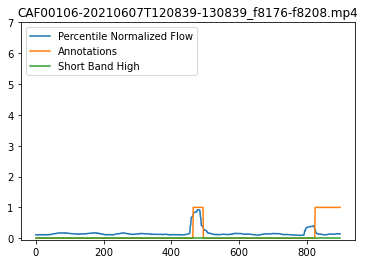

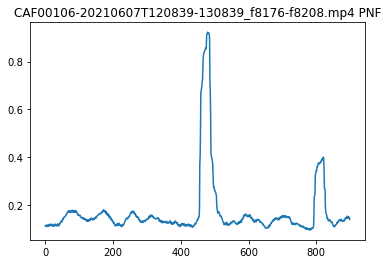

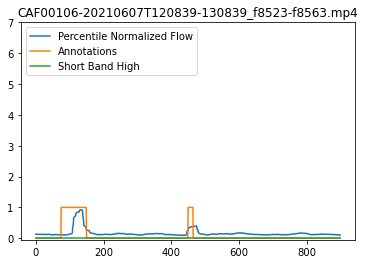

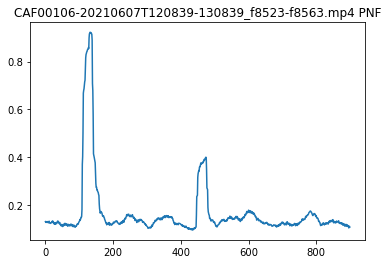

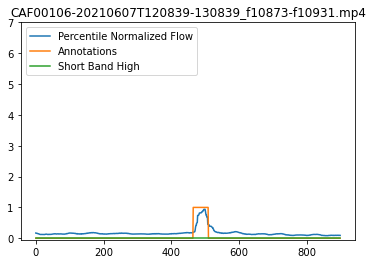

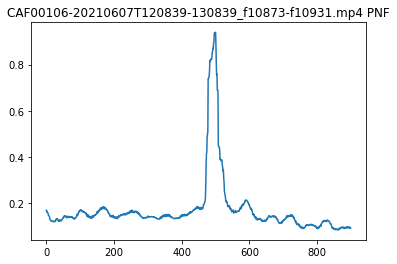

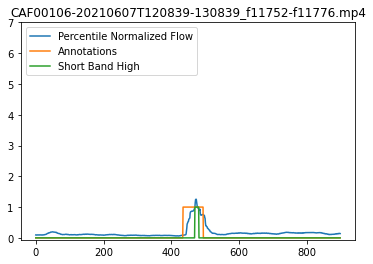

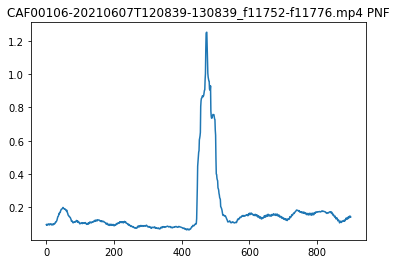

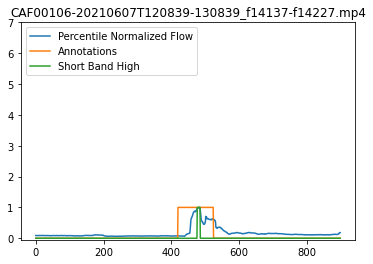

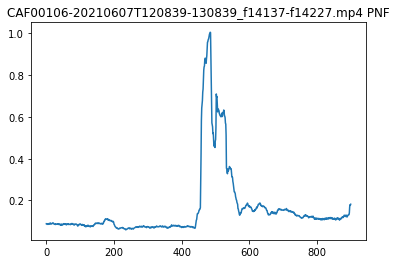

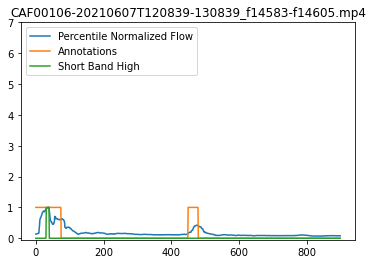

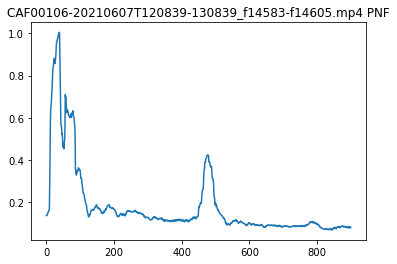

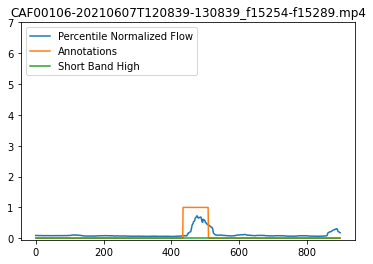

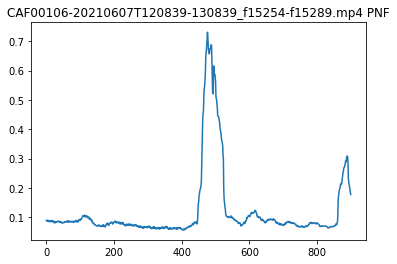

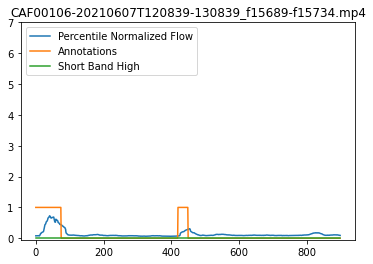

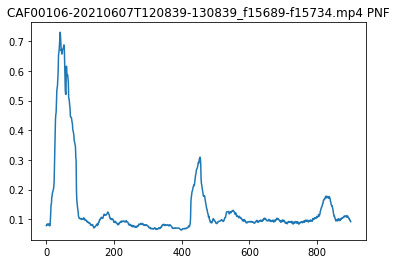

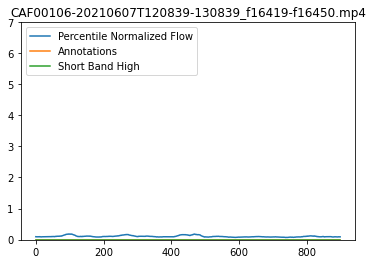

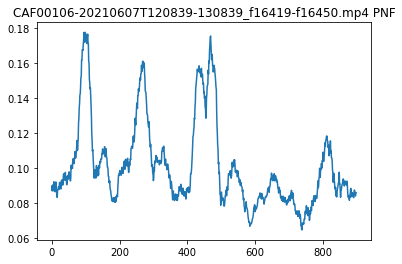

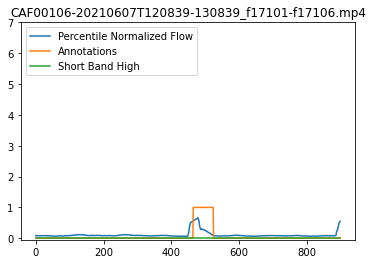

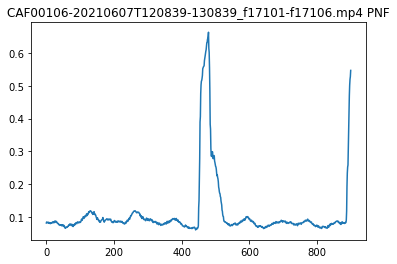

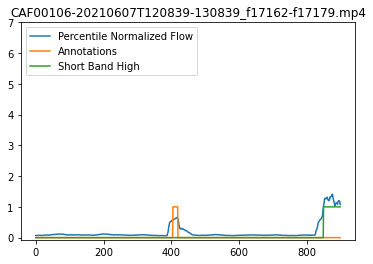

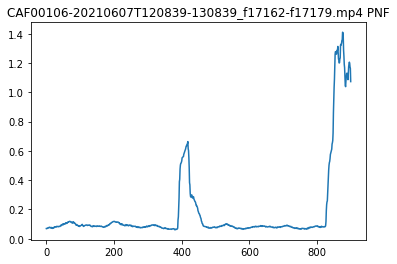

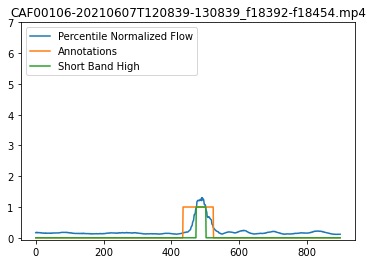

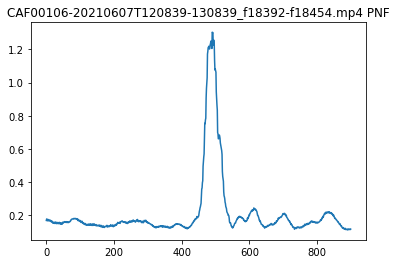

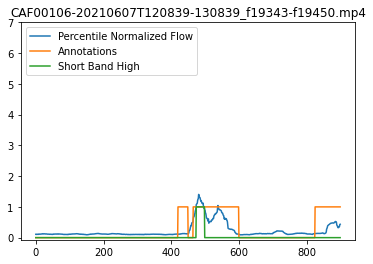

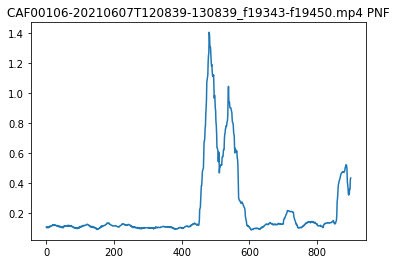

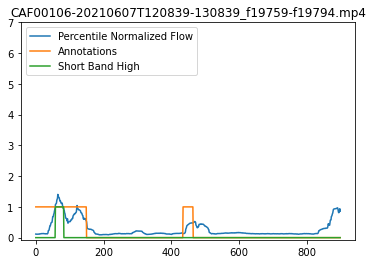

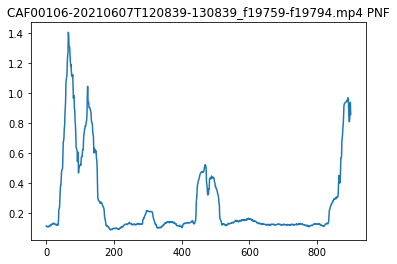

In [222]:
#in frame!
for i, video_name in enumerate(np.unique(video_names)):
    flow, ant, shortb, in_frame, __ = overlap_antof(of106_df, ant106_df, df_oof, video_name)
    for j in range(len(flow)):
        x = range(len(flow[j]))
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.plot(x, ant[j], label = "Annotations")
        plt.plot(x, shortb[j], label = "Short Band High ")
        plt.title(in_frame[j])
        ax = plt.gca()
        ax.set_ylim(top = 7)
        plt.legend(loc="upper left")

        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.title(in_frame[j] + " PNF")
    plt.show()

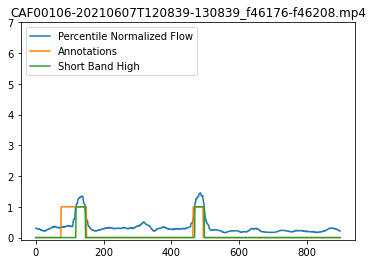

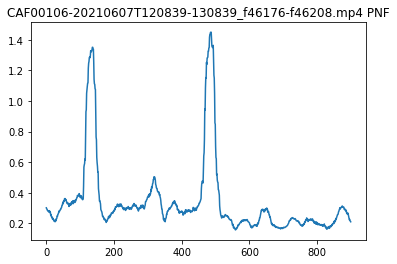

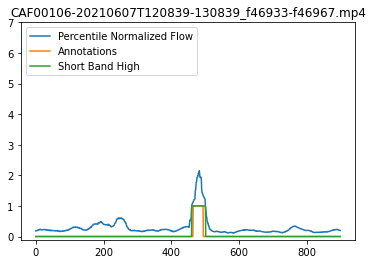

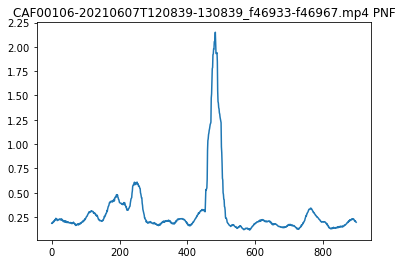

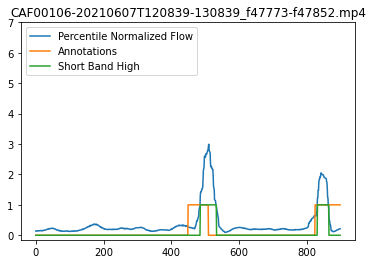

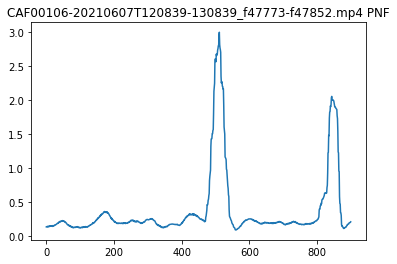

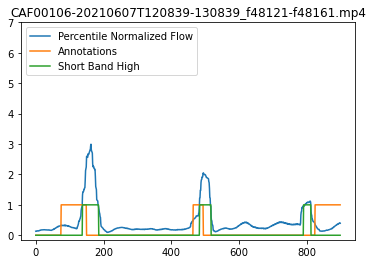

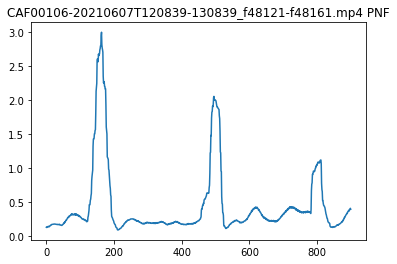

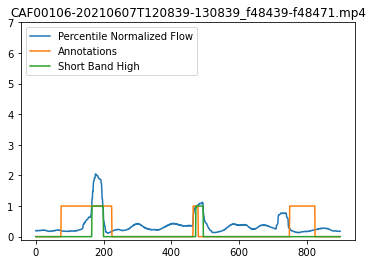

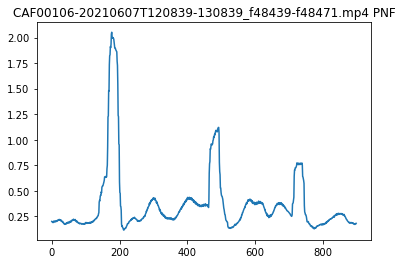

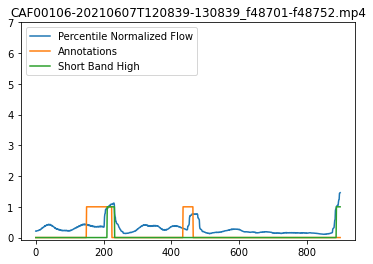

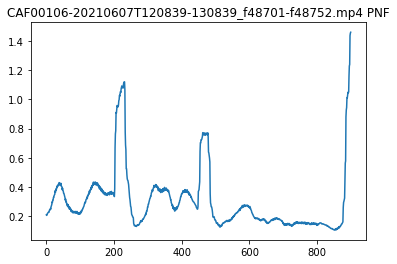

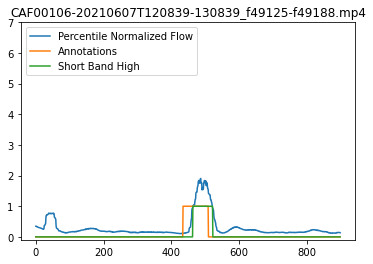

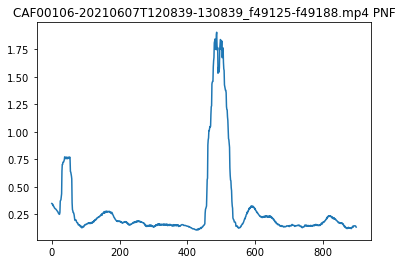

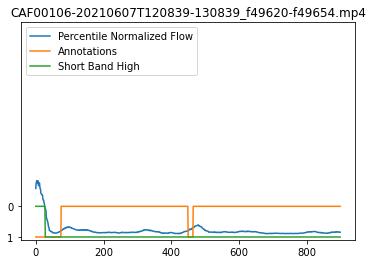

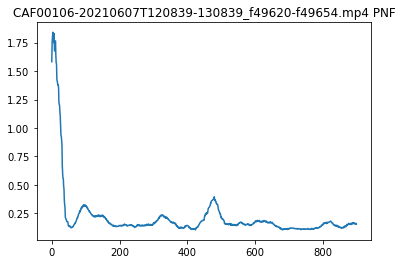

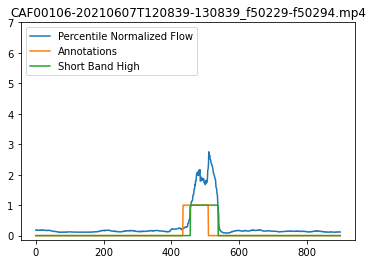

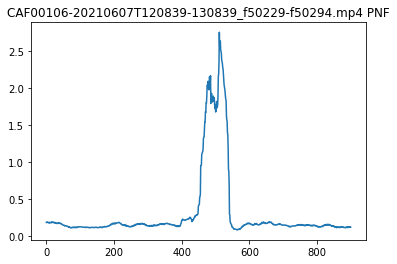

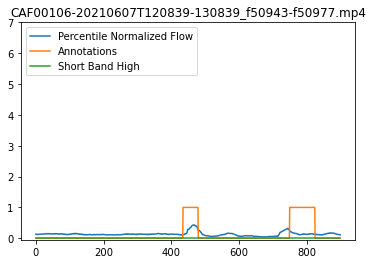

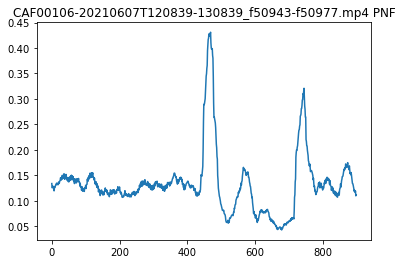

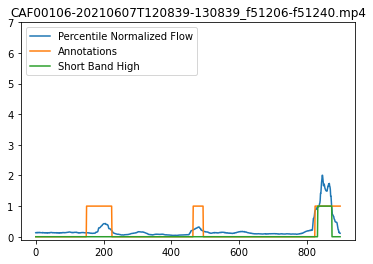

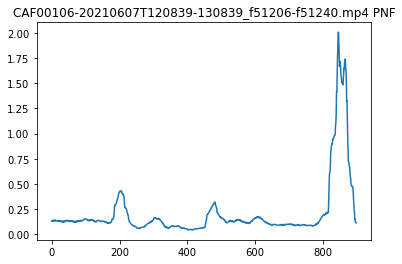

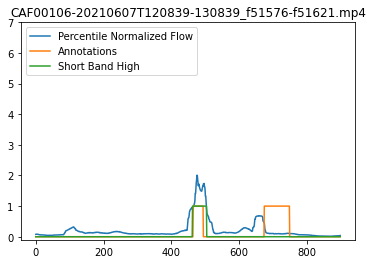

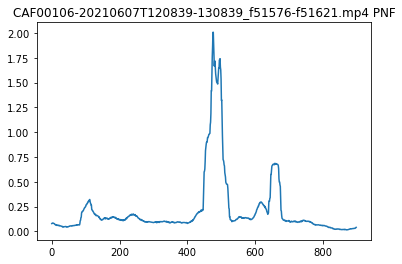

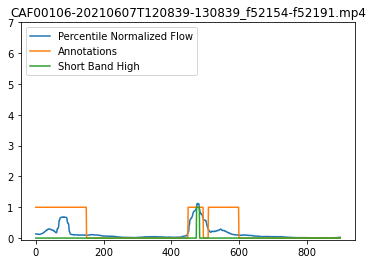

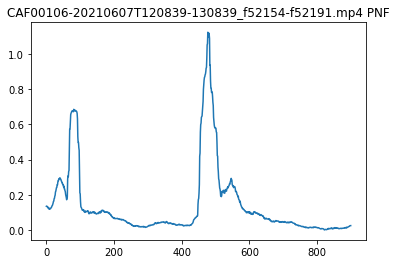

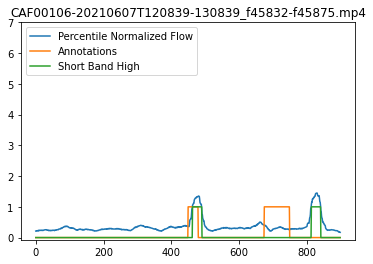

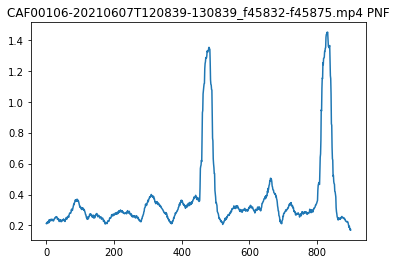

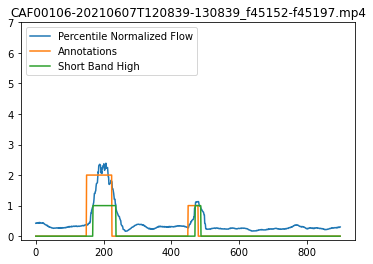

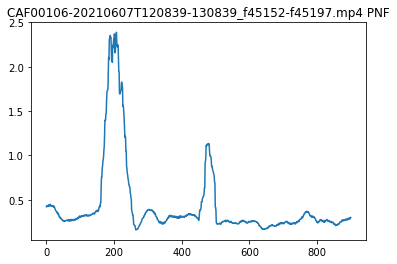

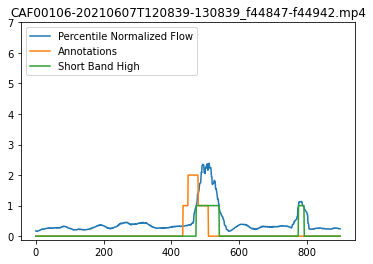

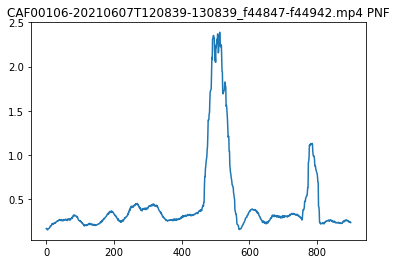

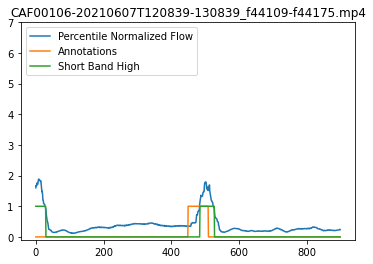

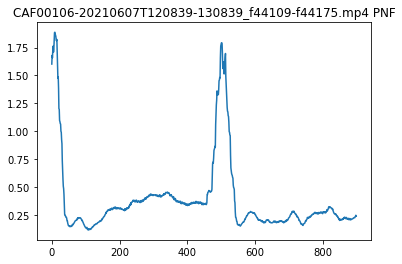

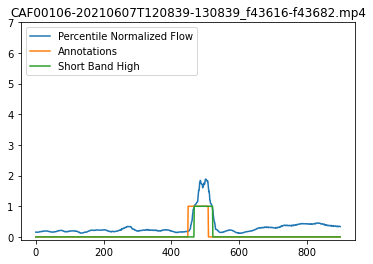

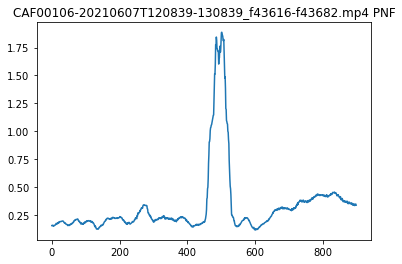

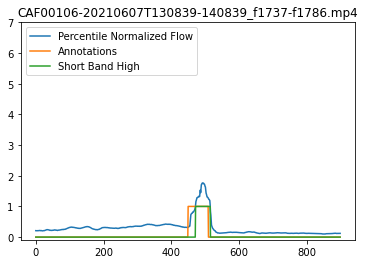

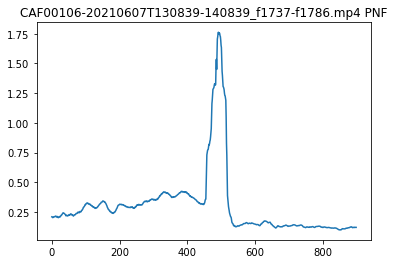

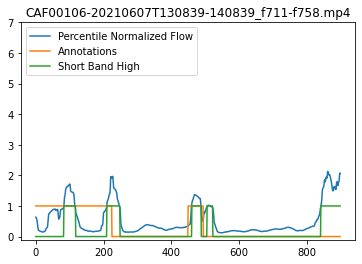

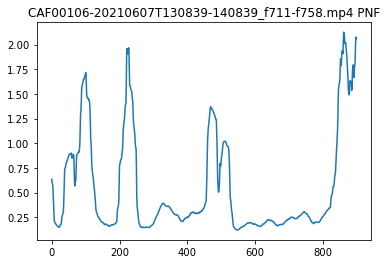

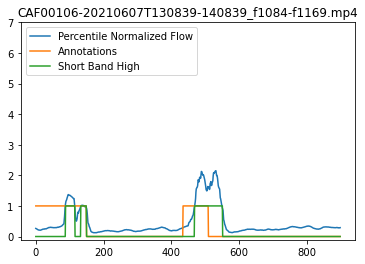

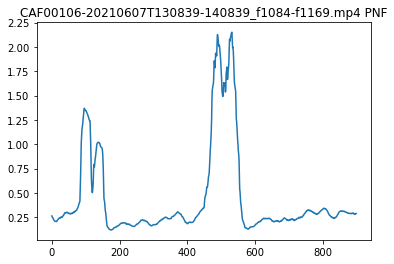

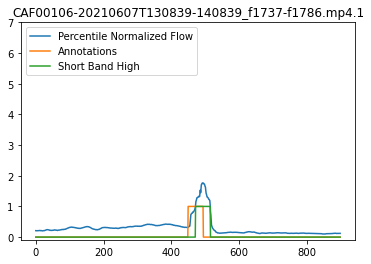

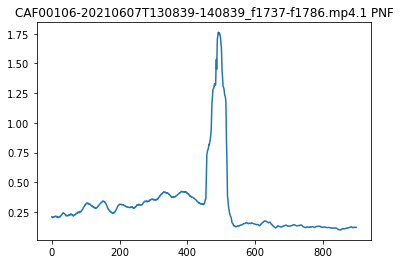

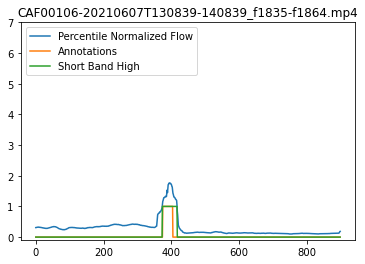

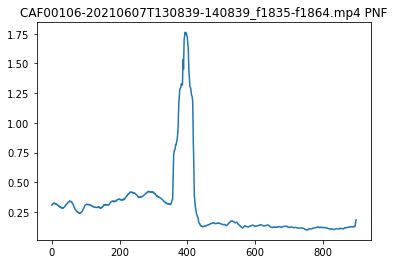

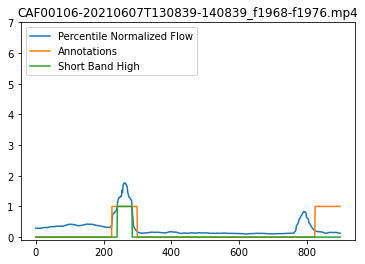

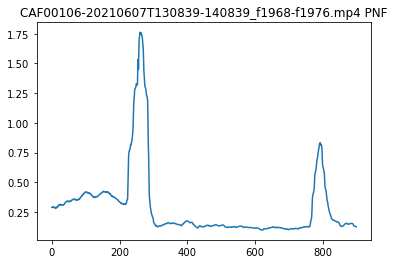

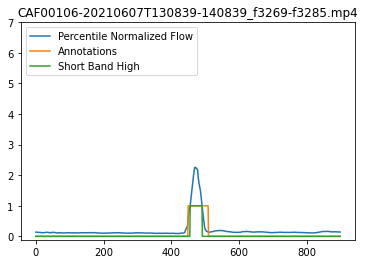

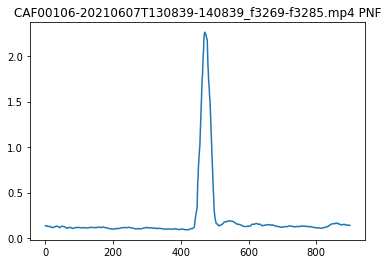

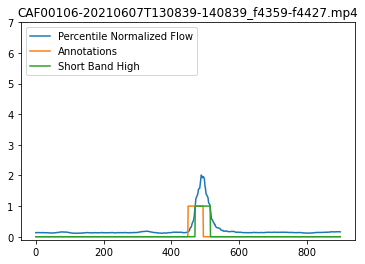

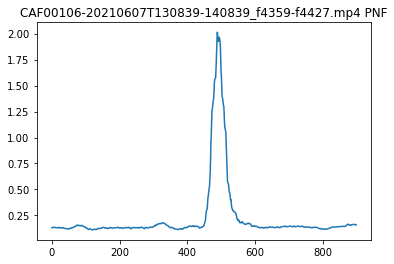

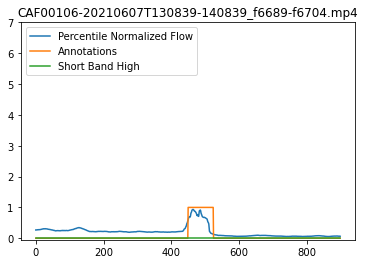

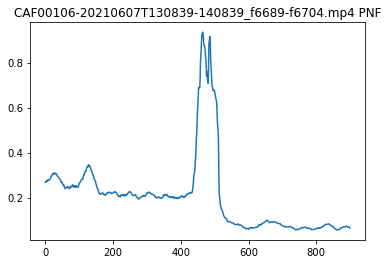

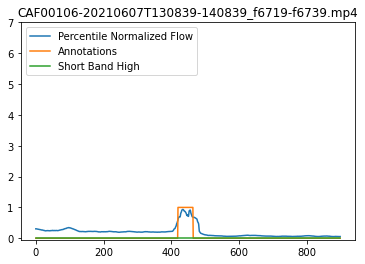

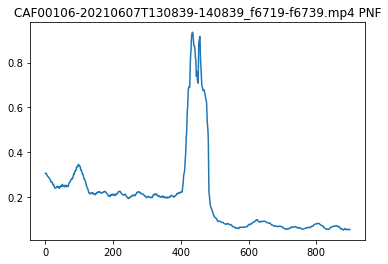

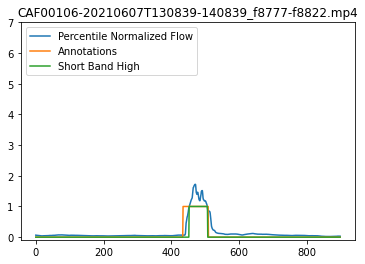

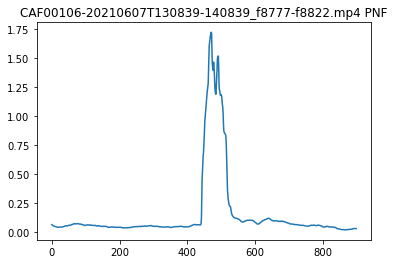

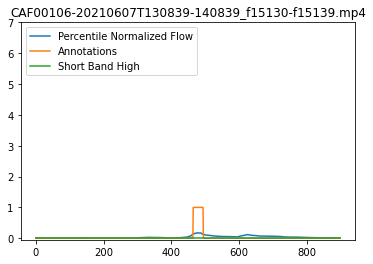

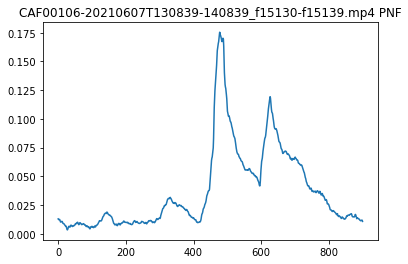

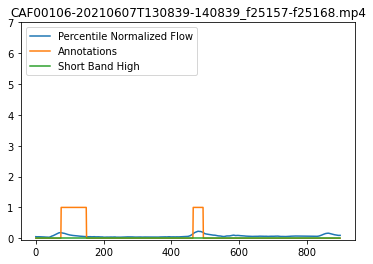

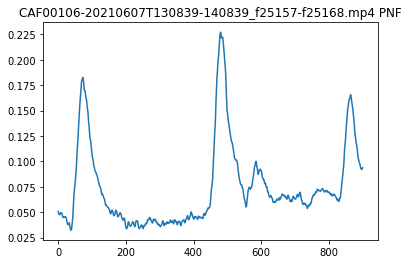

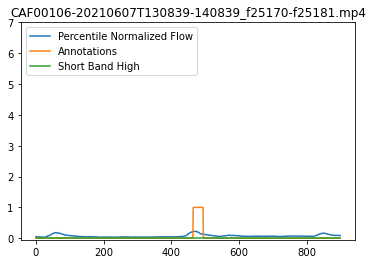

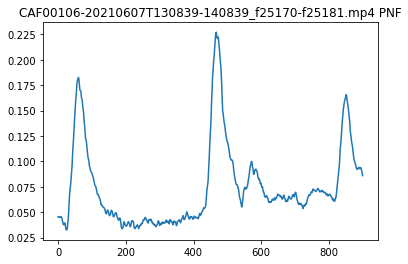

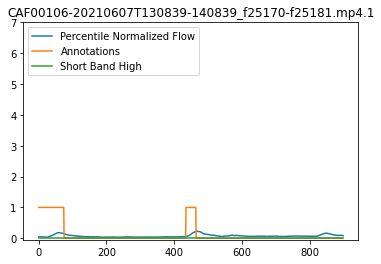

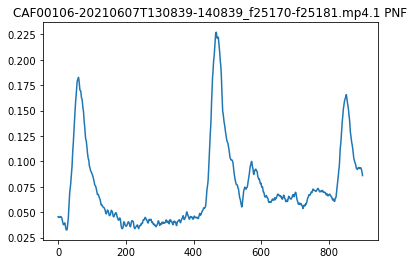

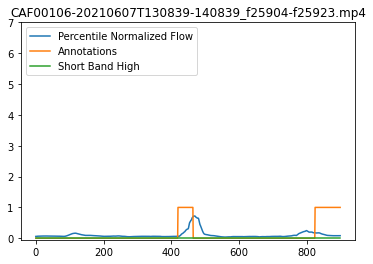

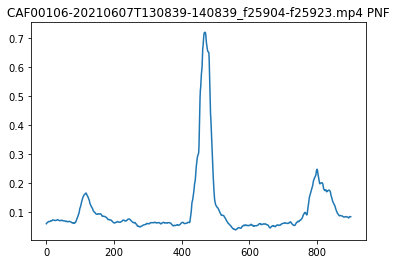

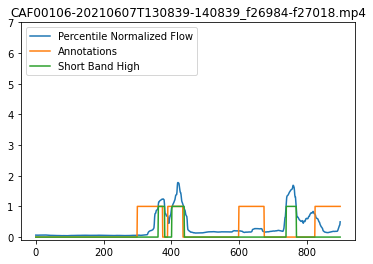

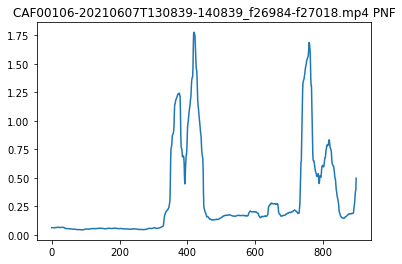

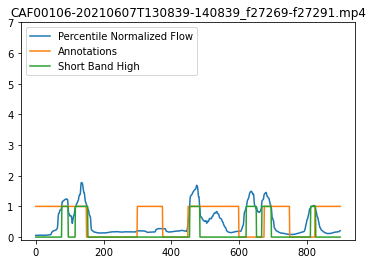

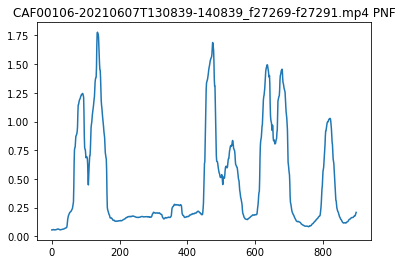

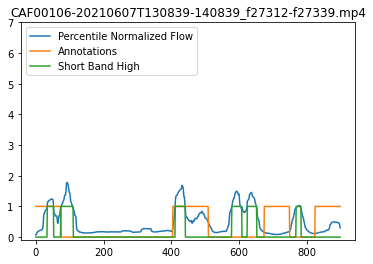

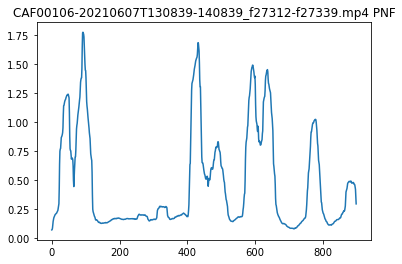

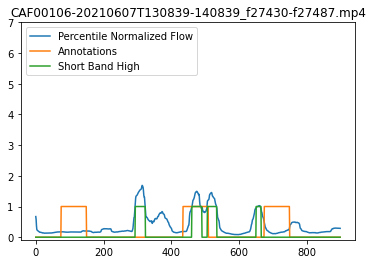

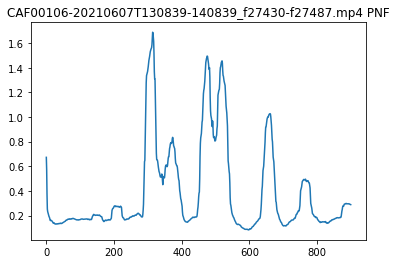

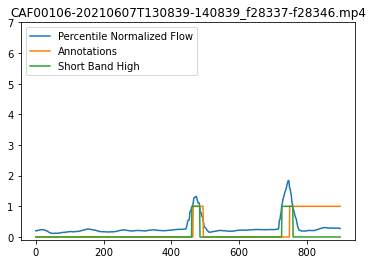

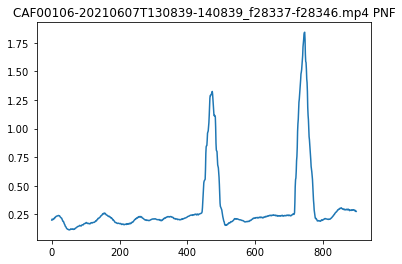

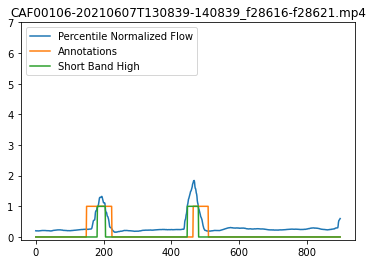

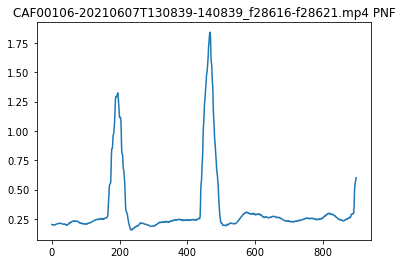

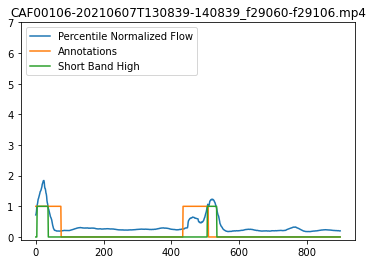

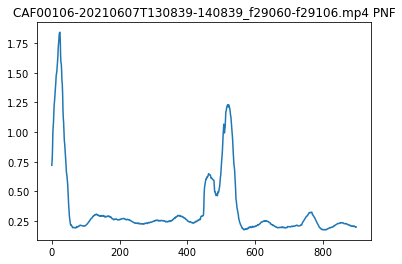

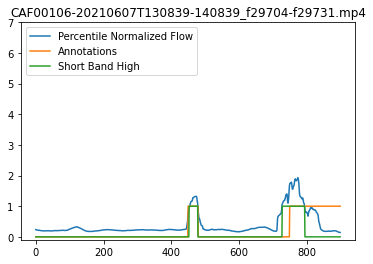

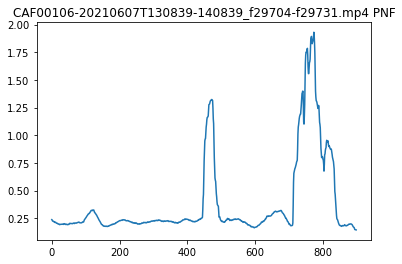

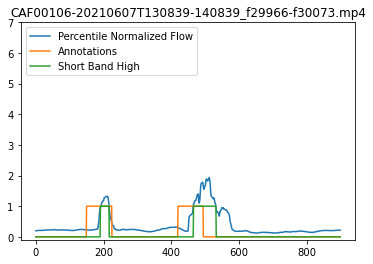

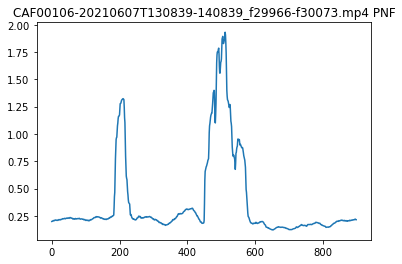

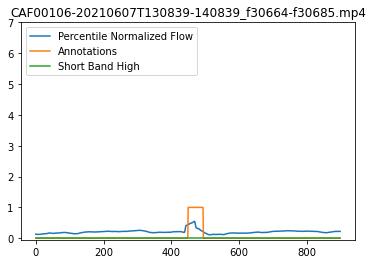

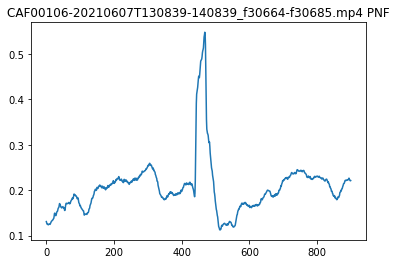

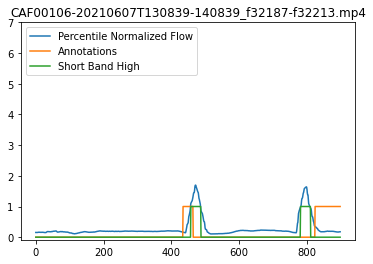

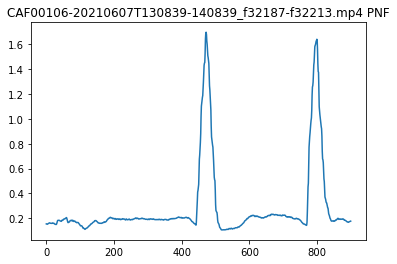

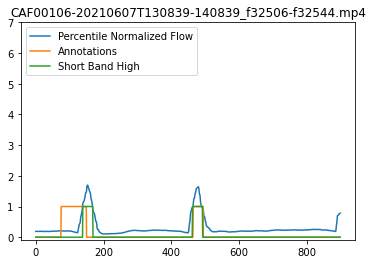

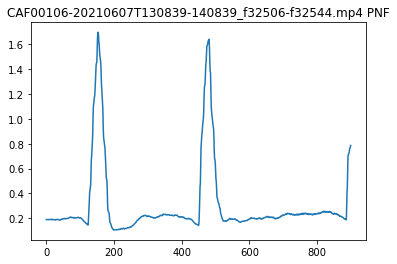

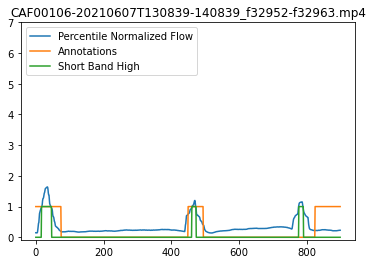

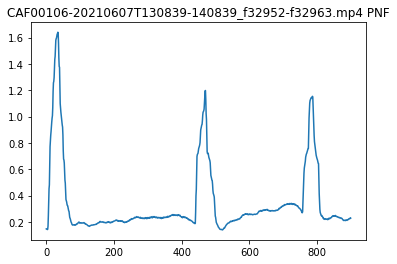

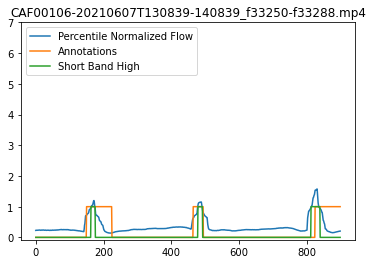

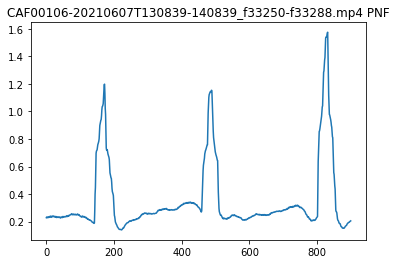

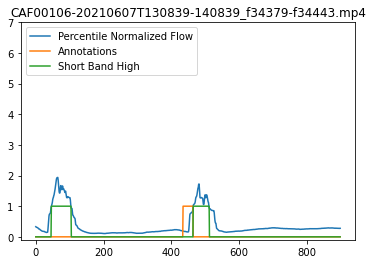

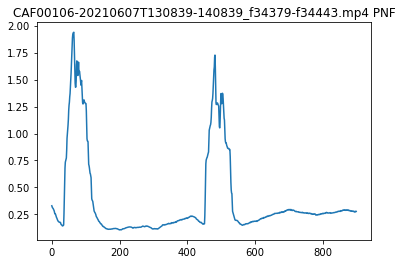

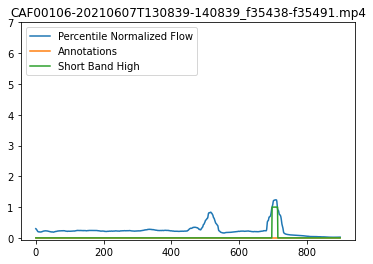

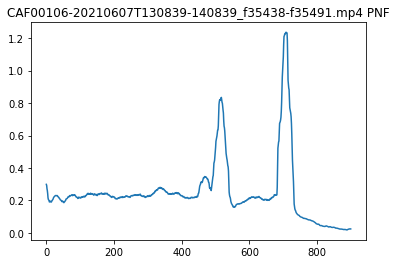

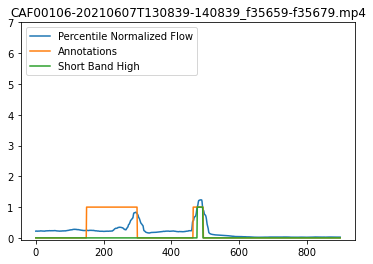

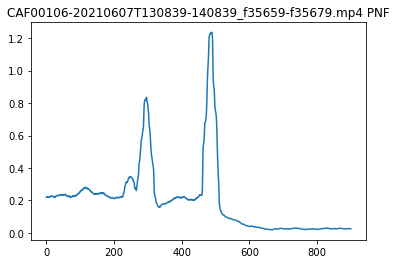

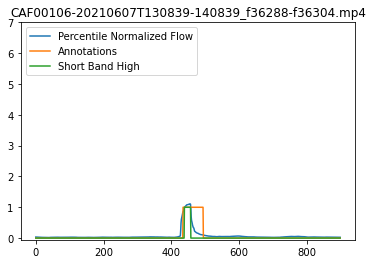

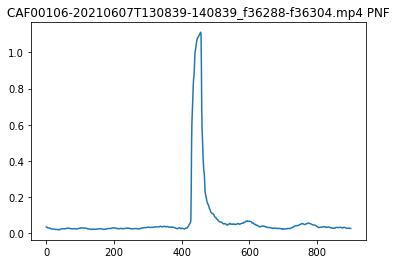

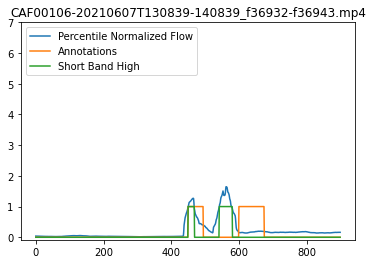

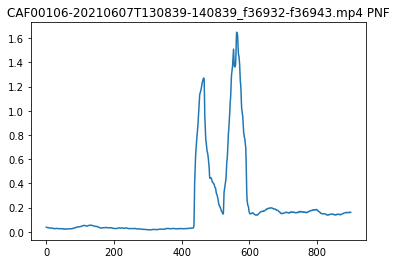

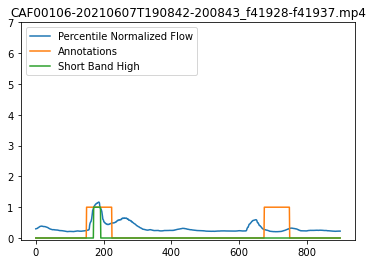

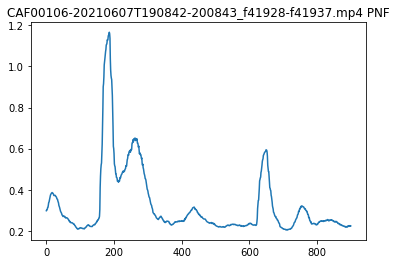

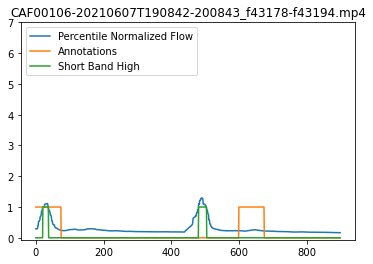

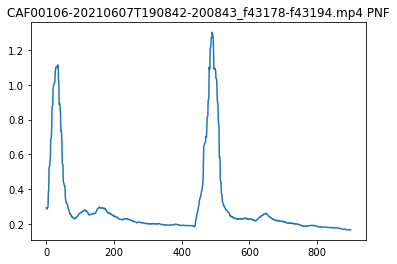

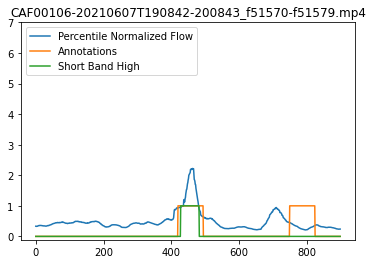

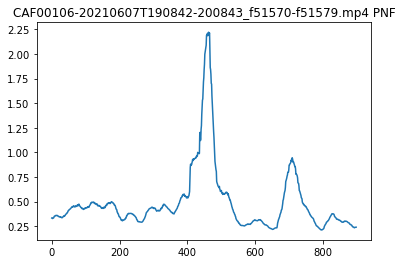

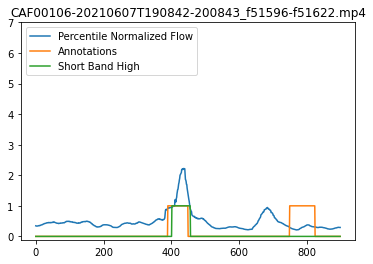

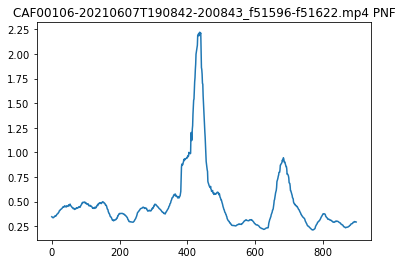

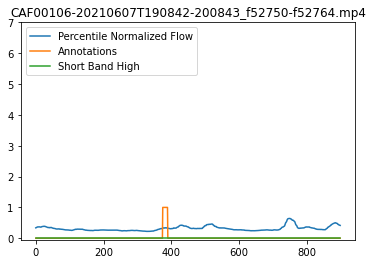

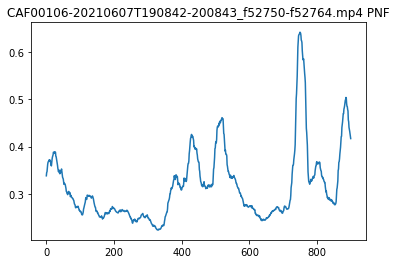

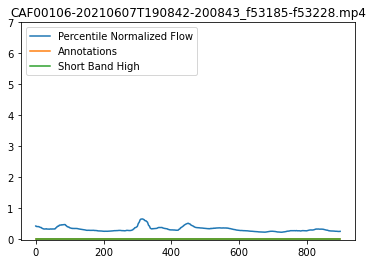

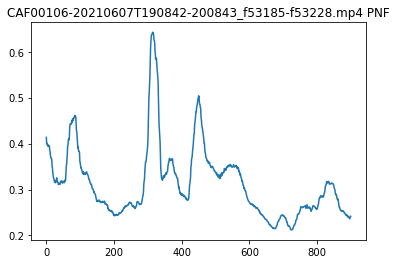

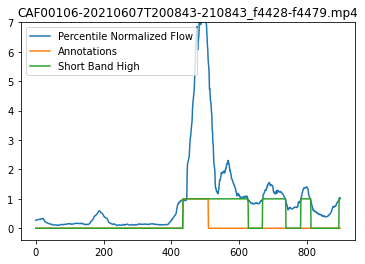

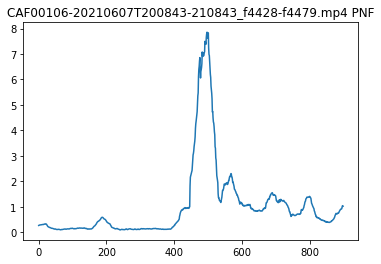

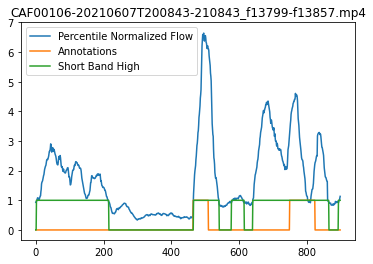

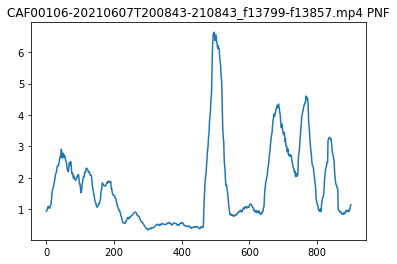

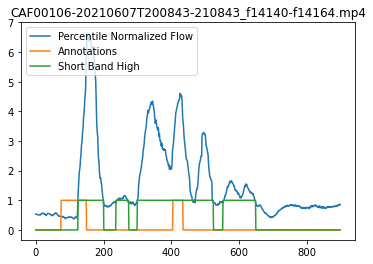

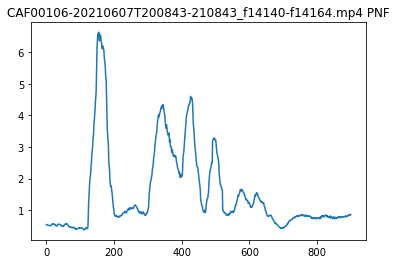

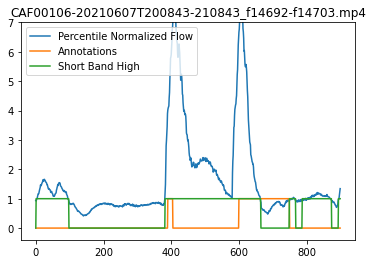

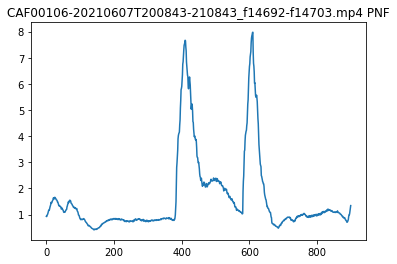

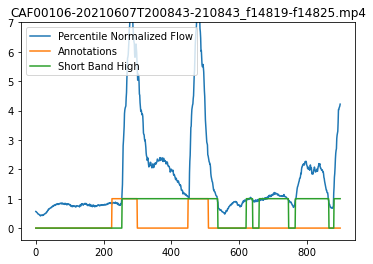

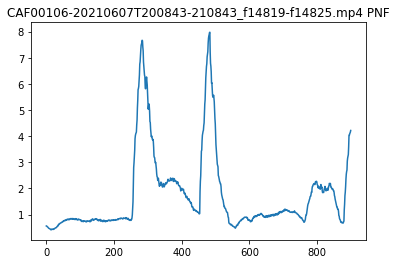

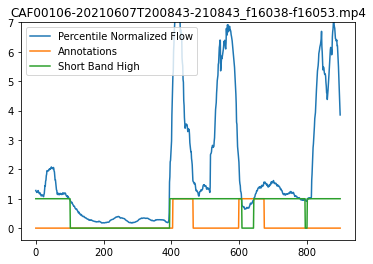

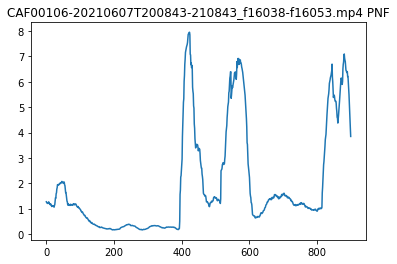

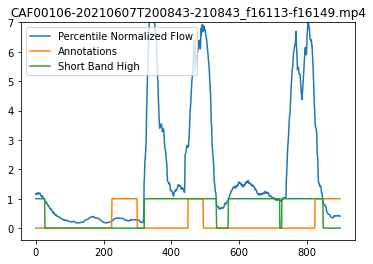

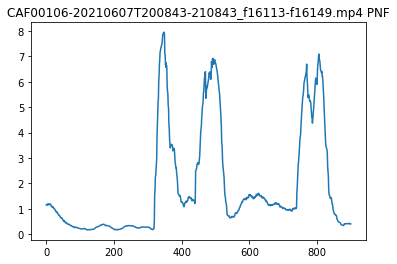

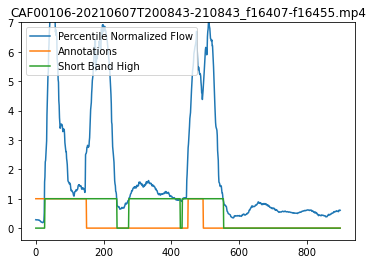

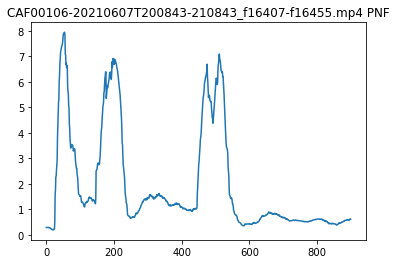

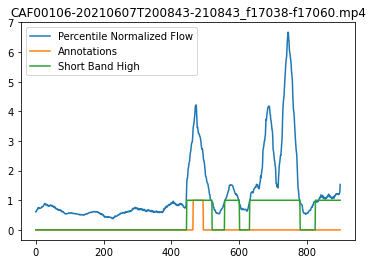

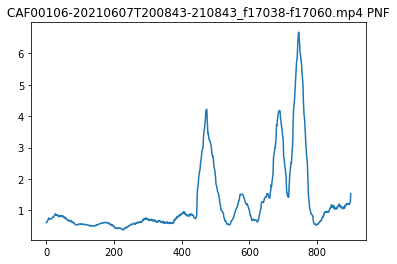

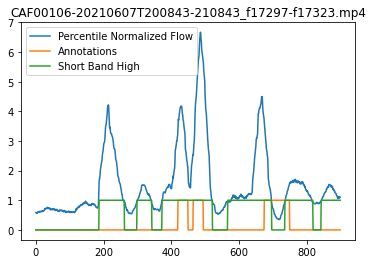

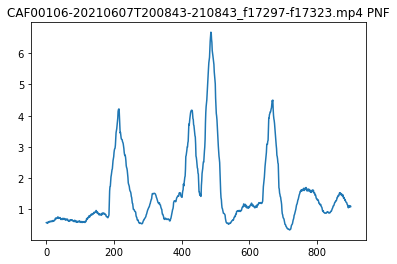

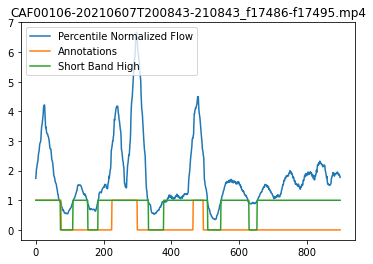

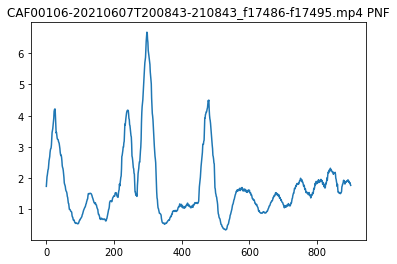

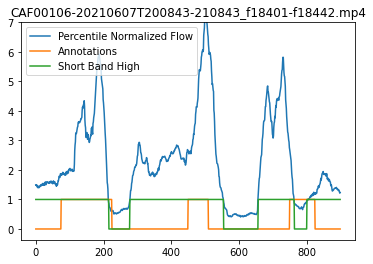

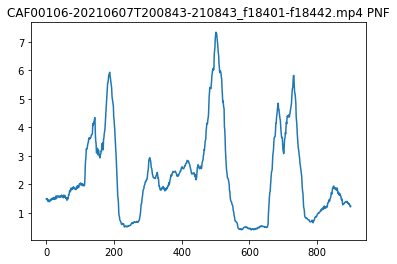

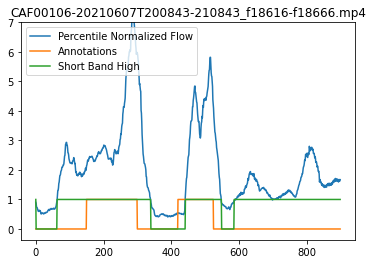

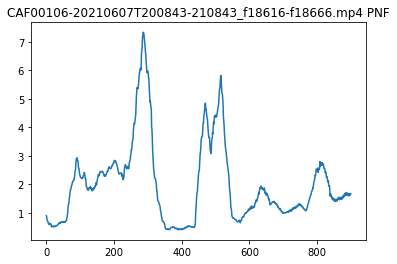

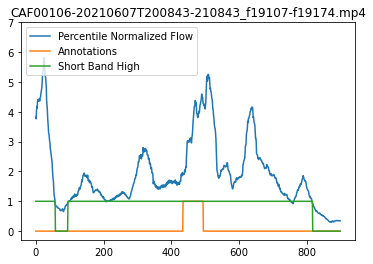

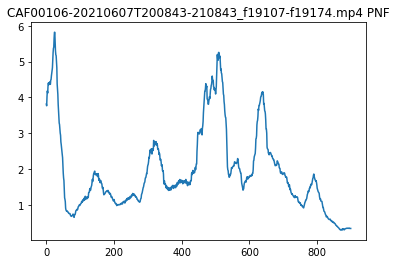

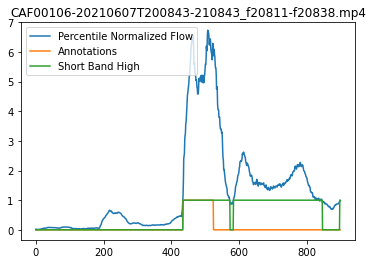

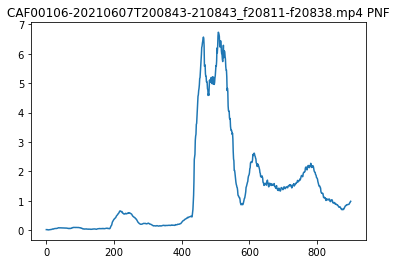

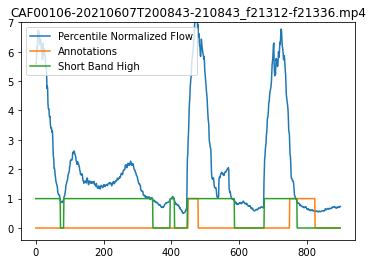

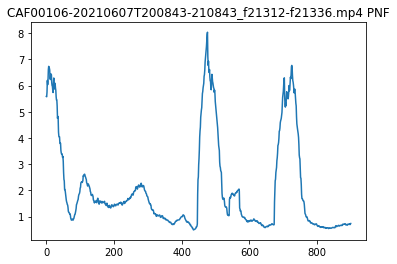

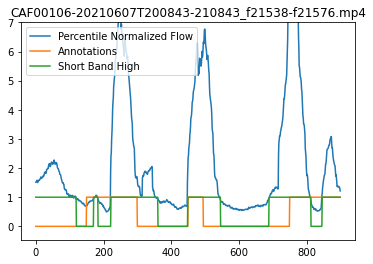

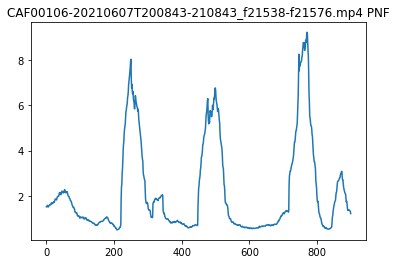

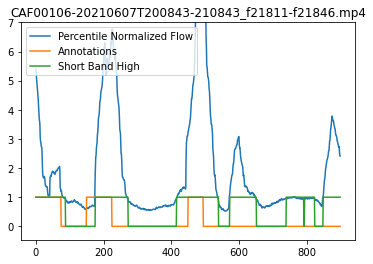

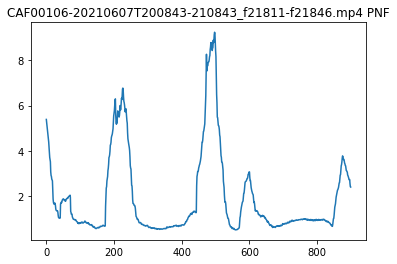

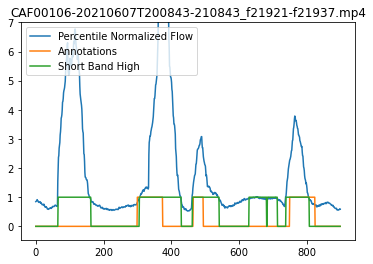

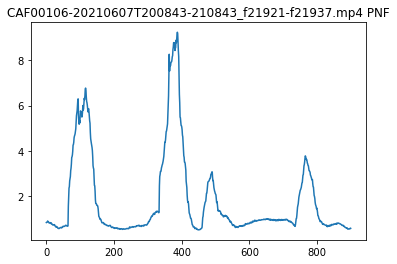

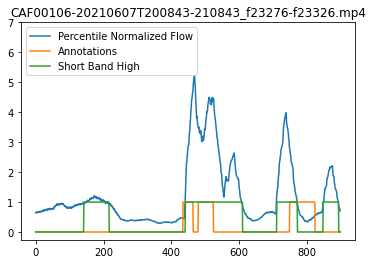

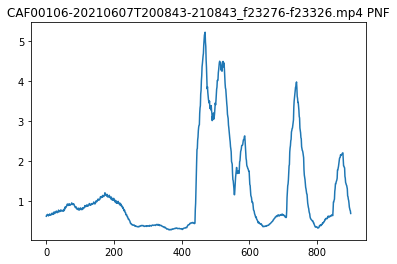

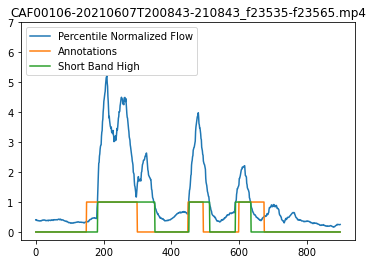

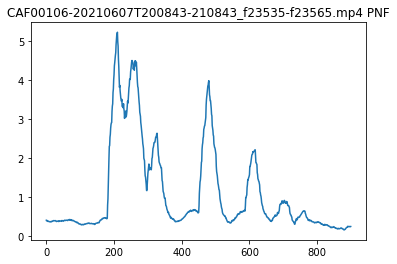

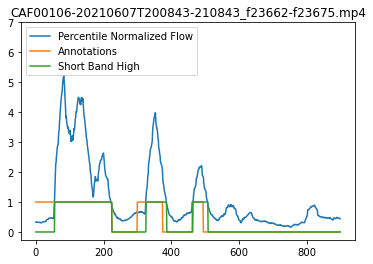

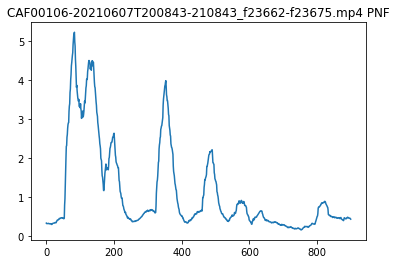

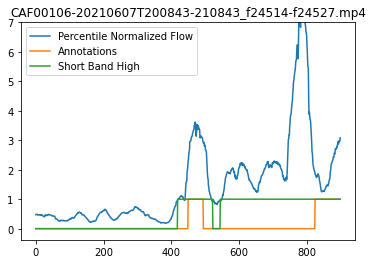

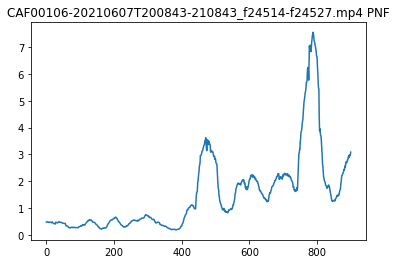

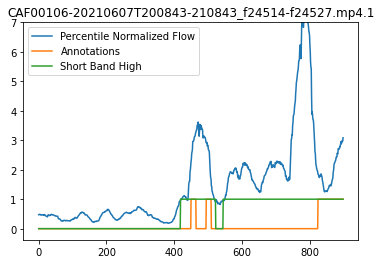

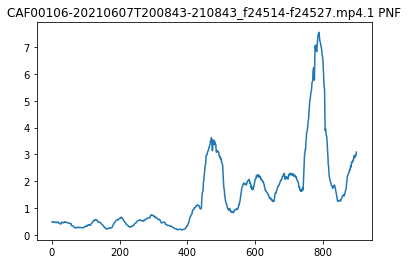

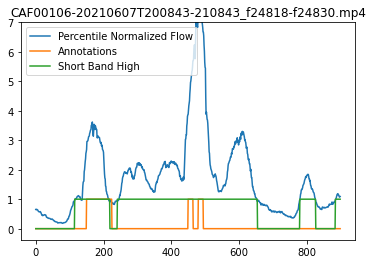

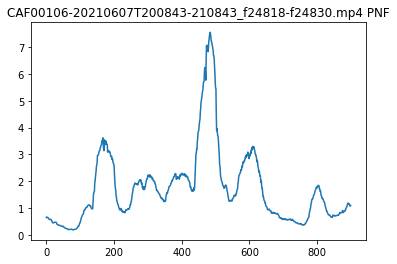

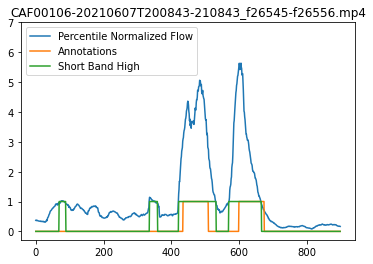

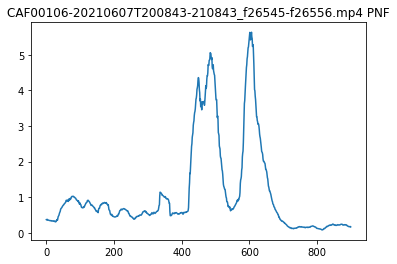

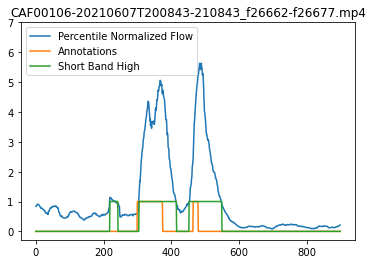

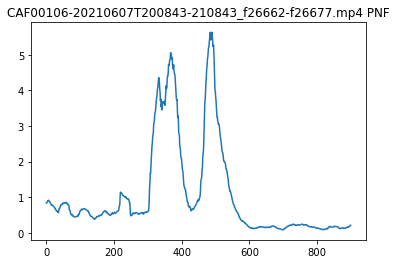

In [224]:
#out frame!
for i, video_name in enumerate(np.unique(video_names)):
    flow, ant, shortb, __, out_frame = overlap_antof(of106_df, ant106_df, df_oof, video_name, False)
    for j in range(len(flow)):
        x = range(len(flow[j]))
        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.plot(x, ant[j], label = "Annotations")
        plt.plot(x, shortb[j], label = "Short Band High ")
        plt.title(out_frame[j])
        ax = plt.gca()
        ax.set_ylim(top = 7)
        plt.legend(loc="upper left")

        plt.figure()
        plt.plot(x, flow[j], label = "Percentile Normalized Flow")
        plt.title(out_frame[j] + " PNF")
    plt.show()

### New Threshold For In Frame Videos

In [167]:
#consolidate to create new dataframe
comp_names = []
comp_median = []
comp_hact = []

for i, unique_video in enumerate(np.unique(video_names)):
    med_fil = median_filter(5, unique_video)
    is_in = is_in_hact(0.35, med_fil)
    
    comp_median.extend(med_fil)
    comp_hact.extend(is_in)
    arr_names = np.full(shape = len(med_fil), fill_value = unique_video + ".mp4")
    comp_names.extend(arr_names)

adjust_cols = {'video_filename' : comp_names, 'percentile_normalized_flow' : comp_median, 'is_in_short_band_high_activity' : comp_hact}
inf106_df = pd.DataFrame(data=adjust_cols)

In [168]:
inf106_df

video_filename  percentile_normalized_flow  \
0       CAF00106-20210607T120839-130839.mp4                    0.180242   
1       CAF00106-20210607T120839-130839.mp4                    0.180790   
2       CAF00106-20210607T120839-130839.mp4                    0.180790   
3       CAF00106-20210607T120839-130839.mp4                    0.180790   
4       CAF00106-20210607T120839-130839.mp4                    0.174288   
...                                     ...                         ...   
216012  CAF00106-20210607T200843-210843.mp4                    0.268499   
216013  CAF00106-20210607T200843-210843.mp4                    0.267172   
216014  CAF00106-20210607T200843-210843.mp4                    0.262665   
216015  CAF00106-20210607T200843-210843.mp4                    0.189932   
216016  CAF00106-20210607T200843-210843.mp4                    0.104131   

        is_in_short_band_high_activity  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
216012                           False  
216013                           False  
216014                           False  
216015                           False  
216016                           False  

[216017 rows x 3 columns]

In [169]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(cols):
    video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(inf106_df, ant106_df, df_oof, video)
    video_ant, video_shortb = temp_flatten(ant_over, shortb_over)
    print(video)
    print(overlap_sens(np.asarray(video_ant).astype(float), np.asarray(video_shortb).astype(float)))

CAF00106-20210607T120839-130839
0.8815686274509804
CAF00106-20210607T130839-140839
None


In [170]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(cols):
    unique_video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(inf106_df, ant106_df, df_oof, unique_video)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(unique_video)
        sens = overlap_sens(flicker_ant[k], shortb_over[k])
        print(sens)
        #values.append(sens)

CAF00106-20210607T120839-130839
0.2761904761904762
CAF00106-20210607T120839-130839
0.9777777777777777
CAF00106-20210607T120839-130839
0.9777777777777777
CAF00106-20210607T120839-130839
0.9833333333333333
CAF00106-20210607T120839-130839
0.9904761904761905
CAF00106-20210607T120839-130839
0.9809523809523809
CAF00106-20210607T120839-130839
0.9866666666666667
CAF00106-20210607T120839-130839
0.7047619047619048
CAF00106-20210607T120839-130839
None
CAF00106-20210607T120839-130839
0.9833333333333333
CAF00106-20210607T120839-130839
0.9333333333333333
CAF00106-20210607T120839-130839
0.9888888888888889
CAF00106-20210607T120839-130839
0.8666666666666667
CAF00106-20210607T120839-130839
0.9888888888888889


In [171]:
for i, unique_video in enumerate(cols):
    unique_video = unique_video.split(".")[0]
    __, ant_over, shortb_over, __, __ = overlap_antof(inf106_df, ant106_df, df_oof, unique_video)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(unique_video)
        print(spec_calc(flicker_ant[k], shortb_over[k]))

CAF00106-20210607T120839-130839
0.85
CAF00106-20210607T120839-130839
0.8877777777777778
CAF00106-20210607T120839-130839
0.9366666666666666
CAF00106-20210607T120839-130839
0.92
CAF00106-20210607T120839-130839
0.8644444444444445
CAF00106-20210607T120839-130839
0.85
CAF00106-20210607T120839-130839
0.9044444444444445
CAF00106-20210607T120839-130839
0.8711111111111111
CAF00106-20210607T120839-130839
1.0
CAF00106-20210607T120839-130839
0.9133333333333333
CAF00106-20210607T120839-130839
0.8888888888888888
CAF00106-20210607T120839-130839
0.9
CAF00106-20210607T120839-130839
0.7255555555555555
CAF00106-20210607T120839-130839
0.7166666666666667


### And Out of Frame Videos

In [251]:
#consolidate to create new dataframe
comp_names = []
comp_median = []
comp_hact = []

for i, unique_video in enumerate(np.unique(video_names)):
    med_fil = median_filter(5, unique_video)
    is_in = is_in_hact(0.35, med_fil)
    
    comp_median.extend(med_fil)
    comp_hact.extend(is_in)
    arr_names = np.full(shape = len(med_fil), fill_value = unique_video + ".mp4")
    comp_names.extend(arr_names)

adjust_cols = {'video_filename' : comp_names, 'percentile_normalized_flow' : comp_median, 'is_in_short_band_high_activity' : comp_hact}
outf106_df = pd.DataFrame(data=adjust_cols)

In [245]:
outf106_df

video_filename  percentile_normalized_flow  \
0       CAF00106-20210607T120839-130839.mp4                    0.180242   
1       CAF00106-20210607T120839-130839.mp4                    0.180790   
2       CAF00106-20210607T120839-130839.mp4                    0.180790   
3       CAF00106-20210607T120839-130839.mp4                    0.180790   
4       CAF00106-20210607T120839-130839.mp4                    0.174288   
...                                     ...                         ...   
216012  CAF00106-20210607T200843-210843.mp4                    0.268499   
216013  CAF00106-20210607T200843-210843.mp4                    0.267172   
216014  CAF00106-20210607T200843-210843.mp4                    0.262665   
216015  CAF00106-20210607T200843-210843.mp4                    0.189932   
216016  CAF00106-20210607T200843-210843.mp4                    0.104131   

        is_in_short_band_high_activity  
0                                False  
1                                False  
2                                False  
3                                False  
4                                False  
...                                ...  
216012                           False  
216013                           False  
216014                           False  
216015                           False  
216016                           False  

[216017 rows x 3 columns]

In [252]:
#overlap sensitivity for hour long videos
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, __, out_frame = overlap_antof(outf106_df, ant106_df, df_oof, unique_video, False)
    video_ant, video_shortb = temp_flatten(ant_over, shortb_over)
    print(unique_video)
    print(overlap_sens(np.asarray(video_ant).astype(float), np.asarray(video_shortb).astype(float)))

CAF00106-20210607T120839-130839
0.8525821596244132
CAF00106-20210607T130839-140839
0.8010822510822511
CAF00106-20210607T190842-200843
0.715
CAF00106-20210607T200843-210843
0.9688734030197445


In [241]:
#overlap sensitivity for individual flickers
values = []
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, __, out_frame = overlap_antof(outf106_df, ant106_df, df_oof, unique_video, False)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(out_frame[k])
        sens = overlap_sens(flicker_ant[k], shortb_over[k])
        print(sens)
        #values.append(sens)

CAF00106-20210607T120839-130839_f46176-f46208.mp4
0.9809523809523809
CAF00106-20210607T120839-130839_f46933-f46967.mp4
0.9666666666666667
CAF00106-20210607T120839-130839_f47773-f47852.mp4
0.9851851851851852
CAF00106-20210607T120839-130839_f48121-f48161.mp4
0.5722222222222222
CAF00106-20210607T120839-130839_f48439-f48471.mp4
0.6791666666666667
CAF00106-20210607T120839-130839_f48701-f48752.mp4
0.9809523809523809
CAF00106-20210607T120839-130839_f49125-f49188.mp4
0.9866666666666667
CAF00106-20210607T120839-130839_f49620-f49654.mp4
None
CAF00106-20210607T120839-130839_f50229-f50294.mp4
0.9866666666666667
CAF00106-20210607T120839-130839_f50943-f50977.mp4
0.0
CAF00106-20210607T120839-130839_f51206-f51240.mp4
0.4111111111111111
CAF00106-20210607T120839-130839_f51576-f51621.mp4
0.2761904761904762
CAF00106-20210607T120839-130839_f52154-f52191.mp4
0.6771929824561403
CAF00106-20210607T120839-130839_f45832-f45875.mp4
0.2761904761904762
CAF00106-20210607T120839-130839_f45152-f45197.mp4
0.98095238095

In [253]:
#specificity
for i, unique_video in enumerate(np.unique(video_names)):
    __, ant_over, shortb_over, __, out_frame = overlap_antof(outf106_df, ant106_df, df_oof, unique_video, False)
    flicker_ant = temp_binary(ant_over)
    
    for k in range(len(flicker_ant)):
        print(out_frame[k])
        print(spec_calc(flicker_ant[k], shortb_over[k]))

CAF00106-20210607T120839-130839_f46176-f46208.mp4
0.7922222222222223
CAF00106-20210607T120839-130839_f46933-f46967.mp4
0.8322222222222222
CAF00106-20210607T120839-130839_f47773-f47852.mp4
0.7833333333333333
CAF00106-20210607T120839-130839_f48121-f48161.mp4
0.5511111111111111
CAF00106-20210607T120839-130839_f48439-f48471.mp4
0.4577777777777778
CAF00106-20210607T120839-130839_f48701-f48752.mp4
0.6722222222222223
CAF00106-20210607T120839-130839_f49125-f49188.mp4
0.8511111111111112
CAF00106-20210607T120839-130839_f49620-f49654.mp4
0.0
CAF00106-20210607T120839-130839_f50229-f50294.mp4
0.8822222222222222
CAF00106-20210607T120839-130839_f50943-f50977.mp4
0.8666666666666667
CAF00106-20210607T120839-130839_f51206-f51240.mp4
0.7933333333333333
CAF00106-20210607T120839-130839_f51576-f51621.mp4
0.8033333333333333
CAF00106-20210607T120839-130839_f52154-f52191.mp4
0.6688888888888889
CAF00106-20210607T120839-130839_f45832-f45875.mp4
0.6888888888888889
CAF00106-20210607T120839-130839_f45152-f45197.mp4